# Credit Fraud Detection
https://www.kaggle.com/mlg-ulb/creditcardfraud


### Objetivo:
Predecir la oportunidad de presentarse un fraude en una transacción de compra con tarjeta de crédito.
Información del dataset:
* Cuenta con 31 columnas, donde se conoce la información que contienen solo tres de ellas: Class (Fraude/No Fraude), Time (tiempo en procesar la transacción), Amount (Monto de la transacción).
El resto de las columnas fueron nombradas V1 a V28, contienen información confidencial. Ya fueron escaladas.

## Datos desbalanceados
Se puede decir que una clase de una variable se encuentra desbalanceada, cuando la diferencia entre una de las clases y otras o el resto, es muy significativa.
Esto trae como consecuencia, que los modelos de clasificación no puedan identificar correctamente las clases minoritarias, ya que el entrenamiento se lleva a cabo con una mayoría de datos distintos a los de la clase minoritaria.
### Técnicas para solucionar el desbalanceo de los datos:

#### 1) Recolectar más datos: 
* En el caso que se trate de un problema de múltiples clases minoritarias, puede analizarse si tienen características comunes y agruparlas en una sola clase.
* Buscar datos de otros períodos de tiempo para la clase desbalanceada, si el proceso presenta las mismas características.

#### 2) Utilizar las métricas de Precisión y Recall como métricas:
* Utilizar las métricas de precisión (una baja precisión  indica un alto número de falsos positivos), recall (un recall bajo indica un alto número de falsos negativos), y F1 (nos indica un resumen de las anteriores).
*Precisión = Verdaderos positivos (TP) / (TP + FP) Positivos predichos (positivos predichos correctamente) + predichos incorrectamente)
*Recall = Verdaderos positivos (TP) / (TP + FN) (positivos predichos + positivos reales)
*F1 = 2TP / (2TP + FP + FN)

#### 3) Resamplear el Dataset:


**a) Reducir la cantidad de registros en la clase mayoritaria(submuestreo):**
este submuestreo se puede llevar a cabo de manera aleatoria, o mediante el análisis de los registros cercanos que puedan pertenecer a dos clases distintas e incrementar la probabilidad de error en la predicción.
*Riesgo: Perder información que pueda conducir al underfitting.*

**b) Incrementar la cantidad de registros en la clase minoritaria(sobremuestreo):**incrementar de manera aleatoria duplicando registros o generar datos sintéticos mediante técnicas de análisis de vecinos más cercanos la clase minoritaria para generar mayor capacidad de entrenamiento. 
*Riesgo: Duplicar registros puede conducir al overfitting.*

#### 4) Utilizar Algoritmos de predicción apropiados:
a) Arboles de decisión

b) Modelos con penalización

c) Modelos de detección de anomalías

### Importante:
En el caso de aplicar técnicas de resampleo o de generacón de ejemplos sintéticos, *primero se debe llevar a cabo el train / test /split de los datos y luego el resampleo. Los datos deben ser validados con datos originales (de otra manera el modelo sería testado con datos sintéticos), conduciendo al overfitting. **texto en negrita**


Importante recordar:

**Positivos reales:** Transacciones fraudulentas clasificadas correctamente.

**Falsos positivos:** Transacciones fraudulentas clasificadas incorrectamente.

**Verdadero negativo:** Transacciones no fraudulentas clasificadas correctamente.

***Falso negativo:*** Transacciones no fraudulentas clasificadas incorrectamente.



**Métricas de clasificación:**

**1. Precisión:** Verdaderos positivos / (Verdaderos positivos + positivos falsos).

**2. Recall:** Verdaderos positivos / ( Verdaderos positivos + falsos negativos).

*La precisión, nos proporciona información sobre el rendimiento con respecto a los falsos positivos (cuántos capturados) (ratio de predición de resultados ciertos), mientras que el recall que recall nos da información sobre el rendimiento de un clasificador con respecto a falsos negativos (cuántos fallaron)(cuántas veces el modelo es capaz de identificar la verdad).* 



Compensación de precisión / recall: cuanto más alto sea uno de los valores, más bajo será el otro.





Para los casos de ***datasets desbalanceados***, donde es necesario concentrarse en la clase más pequeña (en este caso, predecir el fraude), es conveniente utilizar como métricas la ***precisión*** y el ***recall*** ya que estas miden la cantidad de casos positivos en términos de falsos positivos y falsos negativos.

*En estos casos, la matriz de confusión puede no arrojar valores que ayuden a tomar la decisión de cúal es el mejor algoritmo a aplicar.*


Si se desea enfocarse en minimizar los falsos negativos, entonces el recall tiene que ser lo más cercano posible al 100%.
Si se desea enfocarse en minimizar los falsos positivos, entonces la Precisión tiene que ser lo más cercana posible al 100%.



# Importación de librerías a utlizar

In [1]:
# Librerías comunes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from pylab import rcParams
import matplotlib.gridspec as gridspec
import warnings

# Librerías para Machine Learning:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score,precision_score, f1_score, auc
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, neural_network
import xgboost as xgb



# Librerías para gestión de datasets desbalanceados

from imblearn.ensemble import BalancedBaggingClassifier
import imblearn
# Undersampling
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks
#Oversampling:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Unsersampling y oversampling
from imblearn.combine import SMOTETomek


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

# Definición de funciones que agilizarán el análisis de datos / predicciones

In [2]:
# Crear una función para calcular porcentajes:
def porcentajes (df, columna):
    porcentaje = df[columna].value_counts() / df[columna].count()
    return porcentaje

In [3]:
# Función para encontrar outliers:

def outlier_treatment(datacolumn):
    sorted(datacolumn) # Ordernar las filas para poder encontrar los cuartiles
    Q1, Q3 = np.nanpercentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+ (1.5*IQR)
    return lower_range, upper_range

In [4]:
# Crear una función para el filtrado de datos outliers superiores por el método del rango intercuartílico:

def filtrar_iqr_superior(dataset,columna):
    q3=dataset[columna].quantile(0.75)
    q1=dataset[columna].quantile(0.25)
    iqr=q3-q1
    limite_superior=q3+(1.5*iqr)
    dataset=dataset[(dataset[columna] < limite_superior) ]
    return dataset

In [5]:
# Función para detectar múltiples outliers:

from collections import Counter

def detect_outliers(df, n, features):
    outliers_indices = [] #create a empty list to keep track of the passenger row number.
    for col in features:
        # 1st quartile (25%)
        Q1 = np.nanpercentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.nanpercentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)
                              | (df[col] > Q3 + outlier_step)].index
        
        #print(df[(df[col] < Q1 - outlier_step)
                              #| (df[col] > Q3 + outlier_step)].index)
        print(col,Q1-outlier_step,Q3+outlier_step)
        # append the found outlier indices for col to the list of outlier indices
        outliers_indices.extend(outlier_list_col)
        
    #print(outliers_indices)
    
    # select observations containing more than 2 outliers
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(k for k, v in outliers_indices.items() if v > n)
    #print(outliers_indices)
    
    return multiple_outliers

In [6]:
# Definir una función para % de datos faltantes
def porcentaje_faltante (dataset, columna):
    porcentaje_faltante = dataset[columna].isna().sum() / dataset[columna].count()
    return porcentaje_faltante

In [7]:
# Definir una función para graficar múltiples boxplots de un dataset
def plotear_boxplot(dataset, columns = 0):
    
    dataset = dataset.select_dtypes(include = ['float64','int64']) # Dejo únicamente las columnas con las que puedo trabajar

    if columns != 0:
        df_plot = dataset[columns] #columnas ingresadas en formato ["..",".."..]
        col_name = list(columns)
    else:
        df_plot = dataset
        col_name = dataset.columns

    n_plots = df_plot.shape[1]
    
    subplot_files = round(n_plots/4) # para subplots con 2 columnas
    plt.figure(figsize=(12, 4*subplot_files))
    for k in range(0, n_plots):
        plt.subplot(subplot_files, 4, k+1) #sino k es == 0 en el primer subplot
        sns.boxplot(data = dataset, x = "Class", y= df_plot[col_name[k]] )
        plt.ylabel(col_name[k])
        #plt.xlabel(dataset.Class)
    plt.tight_layout()
    plt.show()

In [8]:
# Definir una función para graficar múltiples boxplots sin tomar en cuenta outliers
def plotear_boxplot_sin_out(dataset, columns = 0):
    
    dataset = dataset.select_dtypes(include = ['float64','int64']) # Dejo únicamente las columnas con las que puedo trabajar

    if columns != 0:
        df_plot = dataset[columns] #columnas ingresadas en formato ["..",".."..]
        col_name = list(columns)
    else:
        df_plot = dataset
        col_name = dataset.columns

    n_plots = df_plot.shape[1]
    
    subplot_files = round(n_plots/4) # para subplots con 2 columnas
    plt.figure(figsize=(12, 4*subplot_files))
    for k in range(0, n_plots):
        plt.subplot(subplot_files, 4, k+1) #sino k es == 0 en el primer subplot
        sns.boxplot(data = dataset, x = "Class", y= df_plot[col_name[k]],showfliers = False ) # Agregar el filtro de no considerar outliers para el gráfico
        plt.ylabel(col_name[k])
        #plt.xlabel(dataset.Class)
    plt.tight_layout()
    plt.show()

In [9]:
# Construcción de una función para el modelo de Regresión logística:

def reg_logistica (X_train, X_test, y_train, y_test):
    modelo_logistico = LogisticRegression(C=1.0,penalty='l2',random_state=42,solver="newton-cg")
    modelo_logistico.fit(X_train, y_train)
    return modelo_logistico

In [10]:
# Construcción de una función de árbol clasificador
def forest_classifier (X_train, X_test, y_train, y_test):
    modelo_forest = RandomForestClassifier(bootstrap = False, random_state = 42)
    modelo_forest.fit(X_train, y_train)
    return modelo_forest

In [11]:
# Crear una función para almacenar la matriz de confusión de resumen de métricas de clasificación:


def metricas_clasificacion (y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    labels = ["No Fraudulenta","Fraudulenta"]
    plt.figure(figsize=(8, 8))
    #Graficar la matril de confusión
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predichos')
    plt.show()
    # Obtener el resumen de métricas de clasificación
    print (classification_report(y_test, y_pred))

In [12]:
# Graficar la curva ROC / AUC
def plot_pr_curve(test_y, model_probs):
    # calcular la curva del modelo sin aprendizaje para la clase positiva (fraude)
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # Graficar la curva del modelo sin apredizaje 
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin modelo de entrenamiento')
    # Graficar la curva precision-recall para el modelo aprendido
    precision, recall, _ = precision_recall_curve(testy, model_probs)
    pyplot.plot(recall, precision, marker='.', label='Modelo de predicción')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [13]:
# Función para graficar con DBSCAN
def plot_DBSCAN(X1,labels_1,db,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask_1[db.core_sample_indices_] = True
    # Graficar resultados

    # Crear ruido en el modelo
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Ruido será en negro
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters)
    plt.show()
    return

In [14]:
#Graficar en dos dimesiones la categoría minoritaria

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [15]:
# Separar las clases a graficar
def separate_classes(X,Y):
    c0_indices = np.nonzero(Y==0)
    c1_indices = np.nonzero(Y==1)
    Xmin = X[c0_indices]
    Ymin = Y[c0_indices]
    Xmaj = X[c1_indices]
    Ymaj = Y[c1_indices]
    return Xmin, Ymin, Xmaj, Ymaj

In [16]:
# Crear un scatter Plot para graficar los resultados del resampling

def plotScatterFigures(X, Y, title='Plot title', file_ext=1):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y) # tomar la función anterior para separar los modelos
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    #plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=30, c=colorMaj, edgecolor='k', linewidth=0.2)
    #plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=30, c=colorMin, edgecolor='k', linewidth=0.5)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', c=colorMaj, edgecolor='k', linewidth=0.2)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', c=colorMin, edgecolor='k', linewidth=0.5)

    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.set_xlim([-2,4])
    ax.set_ylim([-4,4])
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([]), ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+str(file_ext)+'.png', bbox_inches='tight', dpi=300)


# Análisis Exploratorio de datos

In [17]:
# Iniciar cargando el Dataset (Para utilizar en entornos distintos a colab)
#df = pd.read_csv("creditcard.csv")
#df.head()


In [18]:
# En el caso de utilizar colab
# Permitir a Colab el acceso a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# En el caso de usar colab, buscar el dataset en los archivos de Drive
path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"
# Leerlo en formato Pandas
df = pd.read_csv(path)
#Visualizar el archivo:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# Describir el nombre de cada una de las variables:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [21]:
# Verificar si existen datos faltantes y describir el tipo de caracteres almacenados en cada variable:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* Todas las variables disponibles son de tipo numérico y el dataset no cuenta con valores faltantes o nulos.

In [22]:
# Verificar las medidas de estadística descriptiva:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Como se trata de información confidencial, en este caso no conocemos que significan cada una de las variables a excepción de las que se describen a continuación:
* Time: segundos que transcurren entre el registro de una transacción
* Amount: Monto de la transacción. Se observa que el valor mínimo es 0. **Es correcto que haya transacciones de monto cero?**
* Class: Si la transacción fue clasificada como fraudulenta o no donde:
0 - Transacción no fraudulenta
1 - Transacción Fraudulenta
* Columnas V1 a V28: parecen encuentrarse escaladas

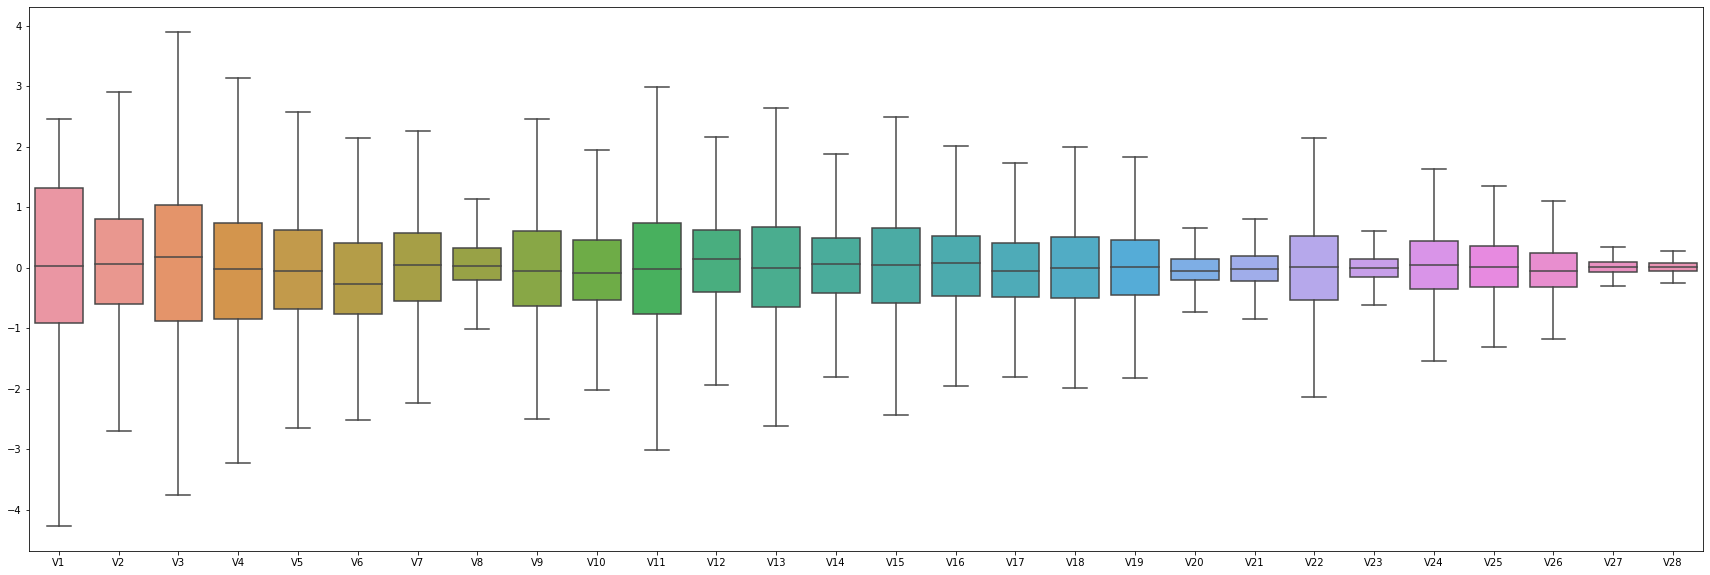

In [23]:
# Efectuar Boxplots de las variables que no conocemos la información que contienen
plt.figure(figsize = (30,10))

sns.boxplot(data=df.drop(columns=["Time", "Amount", "Class"]), showfliers = False);

La comparación comprueba que las variables se encuentran escaladas, donde algunas presentan una mayor dispersión que otras:
* Las variables V1 y V3 son las que presentan mayor dispersión en los datos.
* Las variables V8, V20, V21, V23, V27, V28 presentan los datos muy concentrados alrededor de la media.


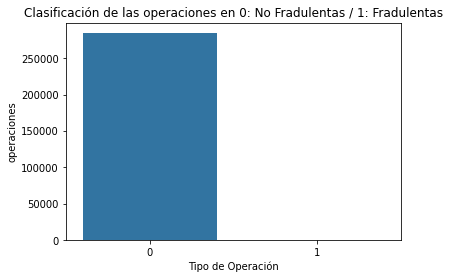

In [24]:
# Graficar la clase de operaciones:
sns.countplot (data = df, x = "Class");
plt.title ("Clasificación de las operaciones en 0: No Fradulentas / 1: Fradulentas")
plt.xlabel ("Tipo de Operación")
plt.ylabel("operaciones")
plt.show();

In [25]:
# Verificar los porcentajes de operaciones fradulentas / no fraudulentas .
print('No Fraudulenta', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Fraudulenta', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% ')

No Fraudulenta 99.83 %
Fraudulenta 0.17 % 


* Esto nos permite arribar a la conclusión a que el dataset se encuentra altamente desbalanceado, por lo que de efectuar modelos de predicción, no va a contar con datos suficientes respecto a las transacciones fradulentas para ser entrenado y poder predecirlas. 
* La clase que se encuentra desbalanceada es la posibilidad de **Fraude**, que es la clase relevante que toma la variable en estudio para este fin.

In [26]:
# Verificar cuantas transacciones son de monto cero y su clase:
monto_cero=df[(df.Amount == 0.00)]
print (monto_cero.Class.value_counts ())

0    1798
1      27
Name: Class, dtype: int64


Existen 1825 operaciones en valor cero, que significan el 0.64% del dataset, pero la cantidad de transacciones fraudulentas dentro de ellas es relevante, ya que significan el 5,48 de los casos fraudulentos disponibles.

*Sería importante verificar con los key users del negocio, en qué situación se dan esta transacciones o si se trata de anulaciones sin efecto para llevar a cabo una correcta predicción.* 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


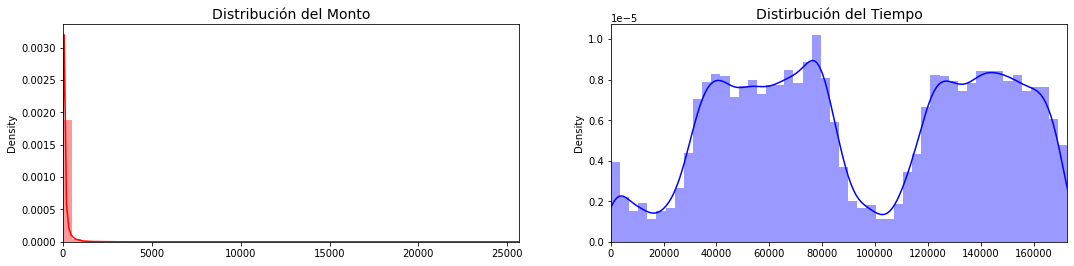

In [27]:
# Verificar las variables de las que se conoce su nombre en término de frecuencia
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribución del Monto', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distirbución del Tiempo', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show();

* Las gráficas permiten observar que en el caso del monto de las transacciones, presenta un gran sesgo a la derecha, indicando que existen pocas transacciones de alto monto.
* El Tiempo de transacción parece presentar una distribución similar a una distibución binomial, donde la separación se produce al valor de 100.000.

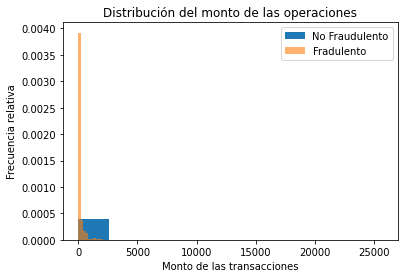

In [28]:
# Graficar los histogramas separando operaciones fradulentas de los fraudulentas
plt.hist(df[df.Class == 0].Amount, alpha=1, density = True, label='No Fraudulento')
plt.hist(df[df.Class == 1].Amount, alpha=0.6, density=True, label='Fradulento')
plt.legend(loc='upper right')
plt.title("Distribución del monto de las operaciones")
plt.xlabel("Monto de las transacciones")
plt.ylabel("Frecuencia relativa");
plt.show()

* Las transacciones fraudulentas se concentran en valores más pequeños por lo que no se puede observar correctamente la distribución.
Se efectuará un nuevo histograma filtrando las transacciones de un valor mayor a $200.

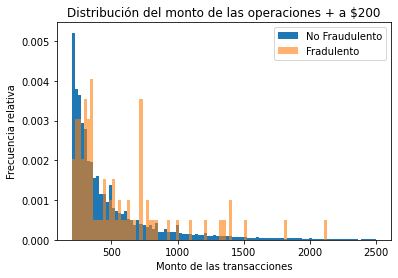

In [29]:
# Graficar los histogramas separando operaciones fradulentas de los fraudulentas
bins = np.linspace(200, 2500, 100)
plt.hist(df[df.Class == 0].Amount, bins, alpha=1, density = True, label='No Fraudulento')
plt.hist(df[df.Class == 1].Amount, bins, alpha=0.6, density=True, label='Fradulento')
plt.legend(loc='upper right')
plt.title("Distribución del monto de las operaciones + a $200")
plt.xlabel("Monto de las transacciones")
plt.ylabel("Frecuencia relativa");
plt.show()

Las operaciones fraudulentas con mayor frecuencia rondan los 250 y 300 USD, como también se presenta una frecuencia alta en transacciones de alrededor de $750 USD.
La distribución del tiempo tampoco es normal, si no que asemeja una distribución de Poisson.

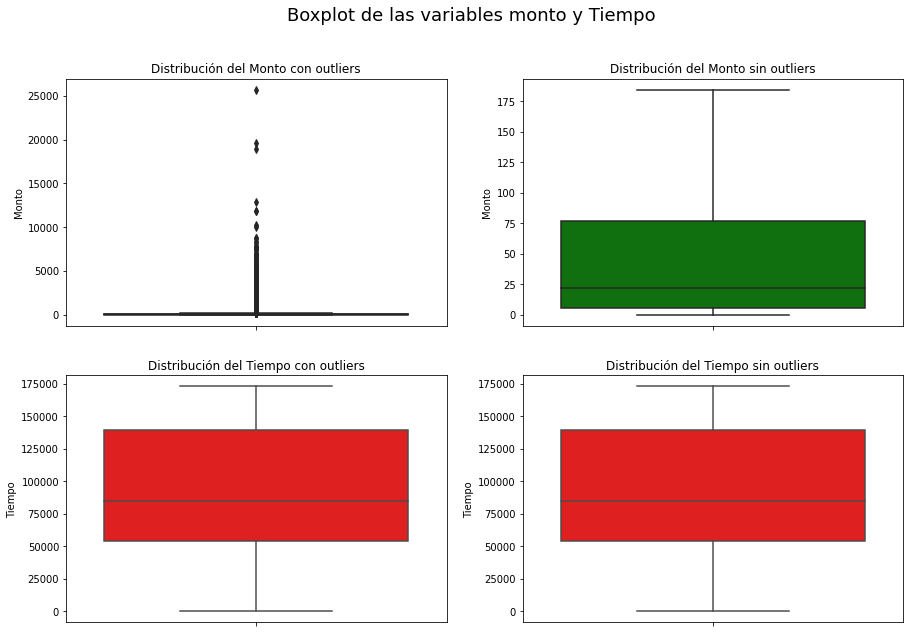

In [30]:
# Efectuar boxplot para comprender con mayor detalle las distribuciones
# Graficar las variables con y sin outliers para la comparación


plt.figure(figsize = (15,10))
plt.suptitle ("Boxplot de las variables monto y Tiempo", fontsize = 18)

plt.subplot(2,2,1) #
sns.boxplot(data = df, y = "Amount", color = "g")
plt.title("Distribución del Monto con outliers")
plt.ylabel("Monto")


plt.subplot(2,2,2) #
sns.boxplot(data = df, y = "Amount", color = "g", showfliers = False)
plt.title("Distribución del Monto sin outliers")
plt.ylabel("Monto")



plt.subplot(2,2,3) #
sns.boxplot(data = df, y = "Time", color = "r")
plt.title("Distribución del Tiempo con outliers")
plt.ylabel("Tiempo")


plt.subplot(2,2,4) #
sns.boxplot(data = df, y = "Time", color = "r", showfliers = False)
plt.title("Distribución del Tiempo sin outliers")
plt.ylabel("Tiempo");

In [31]:
# Verificar los rangos máximos y mínimos que son considerados outliers para las variables tiempo y monto:
print('Rango mínimo y Tiempo:',outlier_treatment(df.Time), sep = '\n')
print('Rango mínimo y Monto:',outlier_treatment(df.Amount), sep = '\n')

Rango mínimo y Tiempo:
(-73477.0, 266999.0)
Rango mínimo y Monto:
(-101.7475, 184.5125)


* Los Boxplots permiten ratificar los observado a través de los histogramas, donde la variable monto presenta gran cantidad de valores extremos, mientras que la variable tiempo presenta una distribución más homogénea.

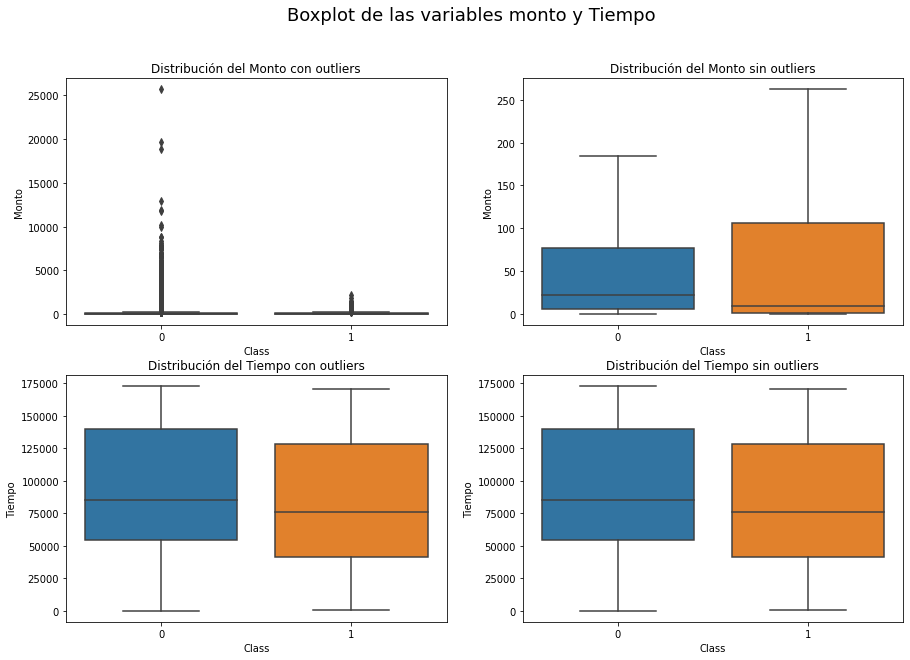

In [32]:
# Graficar los Boxplots segmentando la distribución de las variables por tipo de operación (No Fradulenta/ Fraudulenta)


plt.figure(figsize = (15,10))
plt.suptitle ("Boxplot de las variables monto y Tiempo", fontsize = 18)

plt.subplot(2,2,1) #
sns.boxplot(data = df, y = "Amount", x = "Class")
plt.title("Distribución del Monto con outliers")
plt.ylabel("Monto")


plt.subplot(2,2,2) #
sns.boxplot(data = df, y = "Amount", x = "Class", showfliers = False)
plt.title("Distribución del Monto sin outliers")
plt.ylabel("Monto")



plt.subplot(2,2,3) #
sns.boxplot(data = df, y = "Time", x = "Class")
plt.title("Distribución del Tiempo con outliers")
plt.ylabel("Tiempo")


plt.subplot(2,2,4) #
sns.boxplot(data = df, y = "Time", x = "Class", showfliers = False)
plt.title("Distribución del Tiempo sin outliers")
plt.ylabel("Tiempo");

* La segmentación por clase permite comprender que los valores extremos en el monto de las transacciones se presentan en las operaciones no fraudulentas, aunque, las operaciones fraudulentas presentan un mayor rango y una distribución con mayor asimetría.
* Respecto al tiempo, las variables no presentan diferencia significativa, por lo que no parece ser una variable importante para predecir si una operación es fraudulenta o no.
* También permiten visualizar que en el caso de eliminar outliers de la variable monto, se perderían casos de transacciones fraudulentas, por lo que no conviene aplicar este tipo de filtrado.

 **Una técnica que se podría aplicar es segmentar el dataset de las trasacciones de alto monto de las de un monto inferior para llevar a cabo las predicciones.**

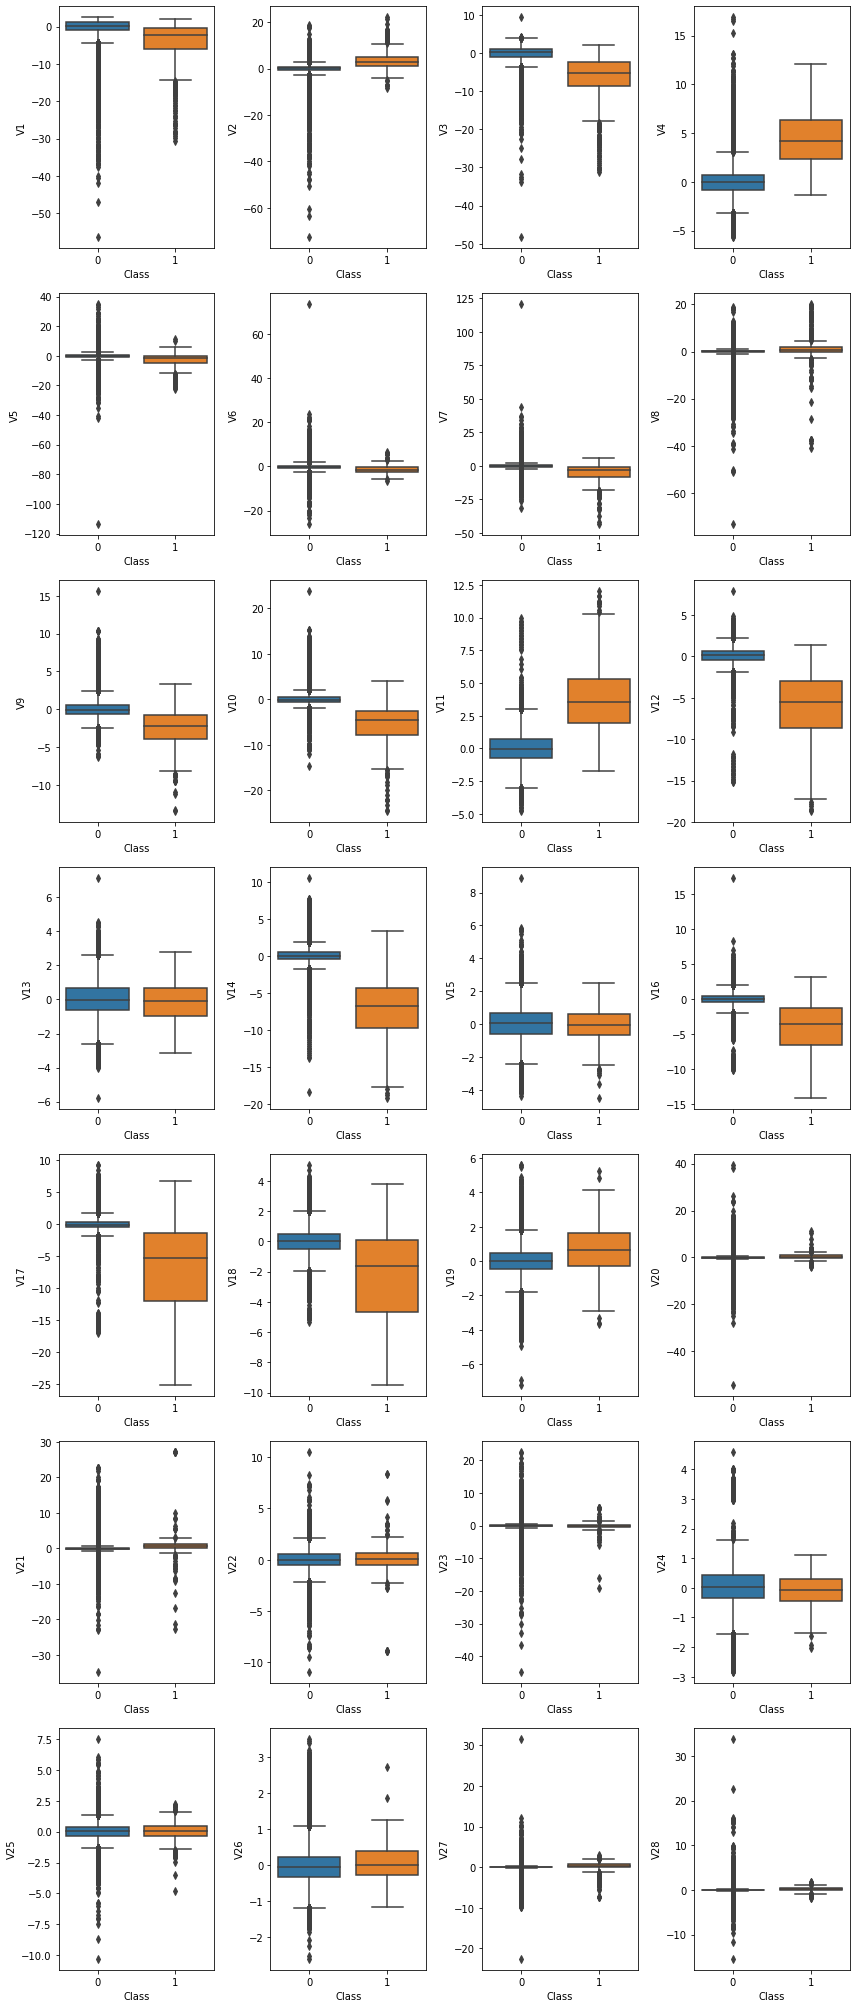

In [33]:
# Verificar la distribución de las variables clasificándolas por clase, teniendo en cuenta outliers:
plotear_boxplot(df, [ "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"] )

* Las variables V7, V9, V12 y V14 en sus operaciones fraudulentas, presentan outliers que son superiores al rango de outliers de las operaciones no fraudulentas, por lo que de aplicar técnicas de eliminación se estarían eliminando registros de operaciones no fraudulentas. Es necesario evaluar si corresponde o no, ya que se estaría reduciendo la muestra en mayor cantidad. El resto de los outliers se presenta en operaciones fraudulentas, por lo que ayudaría a reducir la diferencia entre ambos casos.

**Por lo antes observado, se define separar los datasets en operaciones de valores extremos de las operaciones de valores dentro de los parámetros normales.**

In [34]:
# Verificar la segmentación del dataset, separando el análisis de los casos extremos relacionados al monto del resto.
print('Rango mínimo y Monto:',outlier_treatment(df.Amount), sep = '\n')

Rango mínimo y Monto:
(-101.7475, 184.5125)


In [35]:
montos_maximos = df[(df.Amount >= 184.5125)]
# Verificar la distribución de la variable clase
print (montos_maximos.Class.value_counts())
# Verificar los porcentajes de operaciones fradulentas / no fraudulentas .
print('No Fraudulenta', round(montos_maximos['Class'].value_counts()[0]/len(montos_maximos) * 100,2), '%')
print('Fraudulenta', round(montos_maximos['Class'].value_counts()[1]/len(montos_maximos) * 100,2), '% ')


0    31813
1       91
Name: Class, dtype: int64
No Fraudulenta 99.71 %
Fraudulenta 0.29 % 


De esta manera se trabajarán por separado las operaciones consideradas outliers respecto al monto del resto.

In [36]:
df_filtrado = df[(df.Amount < 184.5125)]
print (df_filtrado.Class.value_counts())
# Verificar los porcentajes de operaciones fradulentas / no fraudulentas .
print('No Fraudulenta', round(df_filtrado['Class'].value_counts()[0]/len(df_filtrado) * 100,2), '%')
print('Fraudulenta', round(df_filtrado['Class'].value_counts()[1]/len(df_filtrado) * 100,2), '% ')

0    252502
1       401
Name: Class, dtype: int64
No Fraudulenta 99.84 %
Fraudulenta 0.16 % 


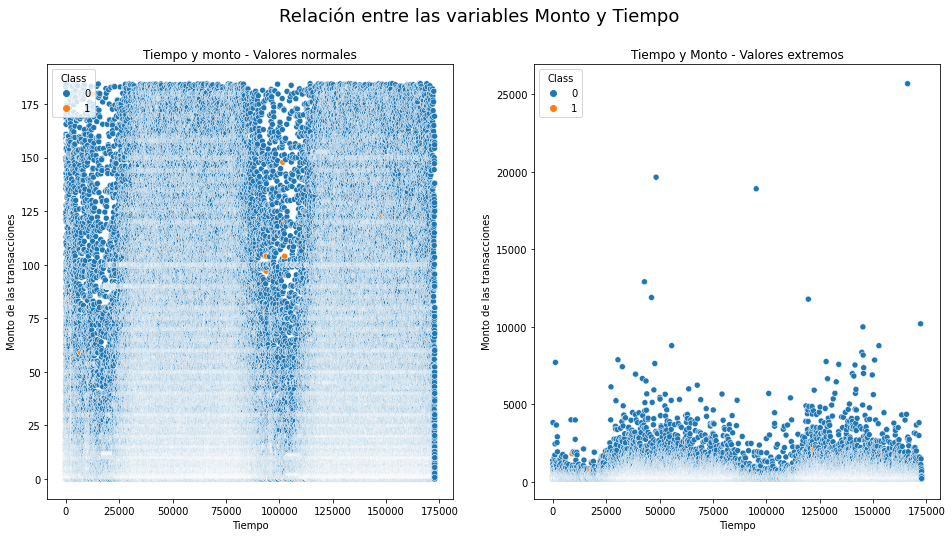

In [37]:
# Graficar la distribución de los valores tiempo y monto según clase

plt.figure(figsize = (16,8))
plt.suptitle ("Relación entre las variables Monto y Tiempo", fontsize = 18)

plt.subplot(1,2,1) 

sns.scatterplot(data=df_filtrado, x="Time", y="Amount", hue="Class");
plt.xlabel ("Tiempo")
plt.ylabel ("Monto de las transacciones")
plt.title ("Tiempo y monto - Valores normales");


plt.subplot(1,2,2) 

sns.scatterplot(data=montos_maximos, x="Time", y="Amount", hue="Class");
plt.xlabel ("Tiempo")
plt.ylabel ("Monto de las transacciones")
plt.title ("Tiempo y Monto - Valores extremos");



La gráfica permite confirmar que no existe una relación positiva entre las variables tiempo y monto, ya que no se observan tiempos altos en las transacciones de mayor monto.

*Se llevará a cabo un análisis de correlación de las variables para montos normales y extremos, con el objetivo de corroborar si la relación tiene modificaciones que refuercen la segmentación.*

In [38]:
#Análisis de correlación entre variables - Valores normales
df_corr= df_filtrado.corr()
df_corr_max = montos_maximos.corr()

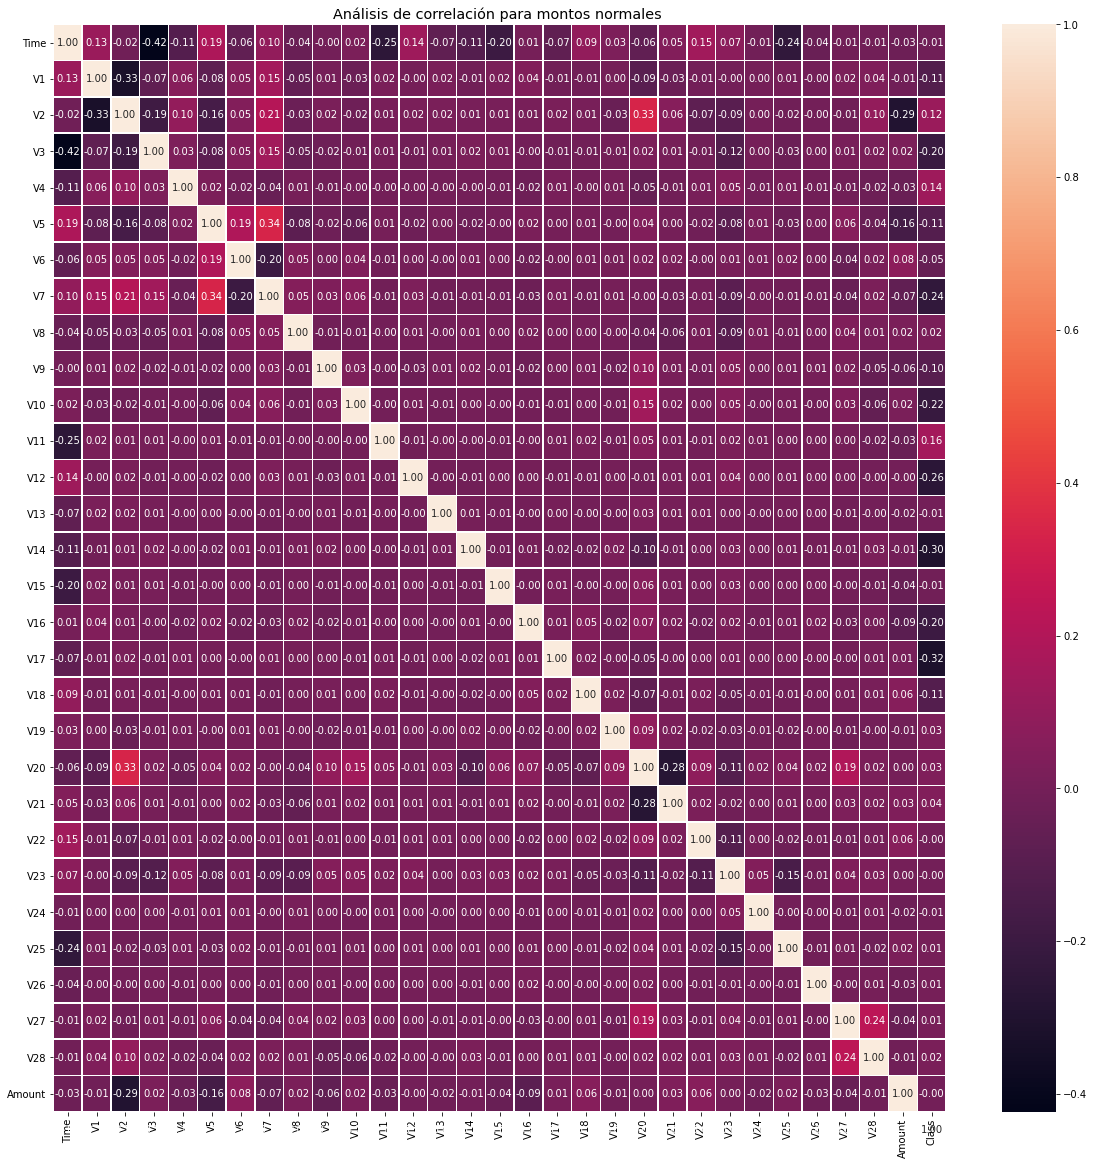

In [39]:
# Graficar la correlación de las variables con la Clase

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_filtrado.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
plt.title("Análisis de correlación para montos normales ", size = "x-large")

ax.set_ylim(30, 0);

En primera instancia, no se observa ninguna variable con una correlación superior 0.5 respecto al monto de las operaciones.

Se puede observar que las variables más relacionadas con el monto de las operaciones son las variables V2 y V5 que presentan una correlación negativa.

A su vez, no se observa correlación significativa entre las variables que se desconoce su identiad.

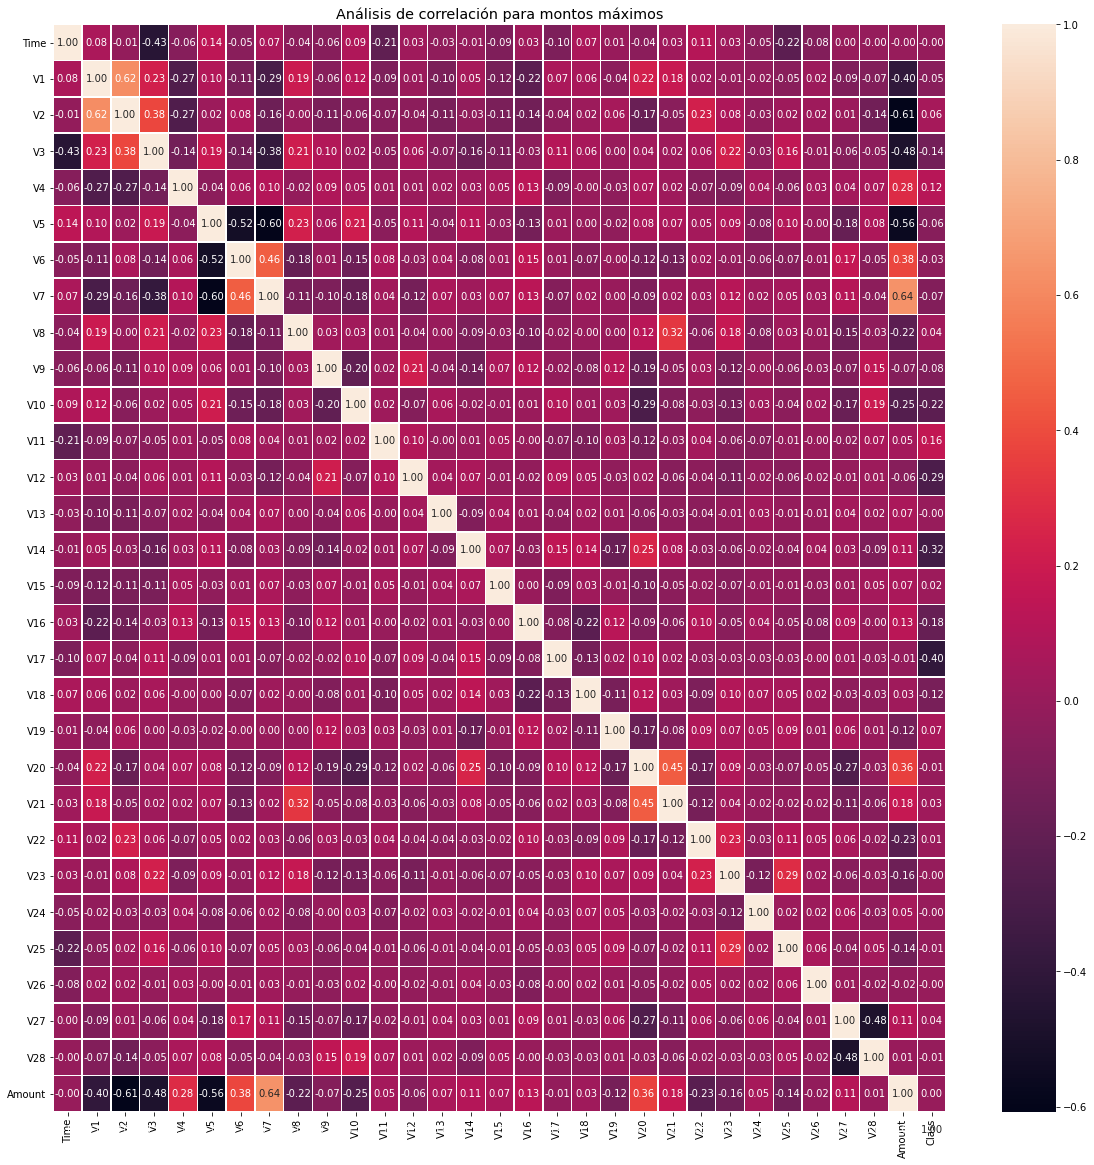

In [40]:
# Graficar la correlación de las variables para valores de monto máximo

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(montos_maximos.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
plt.title("Análisis de correlación para montos máximos", size = "x-large")

ax.set_ylim(30, 0);

En los valores extremos, se observa una mayor correlación tanto positiva y negativa con las variables respecto al monto, encontrandose V7, V2 y V5 con valores superiores a 0.5, siendo la relación de V7 positiva mientras que V2 y V5 es negativa.
Esto refuerza la hipótesis de trabajar con datasets separados para llevar a cabo las predicciones.


#### Conclusiones del análisis de datos:

Se observa que el dataset presenta sus datos altamente desbalanceados, donde la variable relevante, que es la existencia de fraude, variable positiva, es de la que menor cantidad de datos se cuenta.
No se observa una relación relevante entre el tiempo de transacciones y la posibilidad de fraude. 
Si se observa que las mayoría de los fraudes ocurren dentro del rango normal, pero la dispersión de estos casos es mayor por lo que amerita una segmentación de los datasets  según montos en el rango normal / extremos con el objetivo de incrementar la calidad de las predicciones.

## Aplicación de modelos de predicción
Se llevarán a cabo a modo comparativo los modelos que se detallan:

1. Modelo sin transformaciones: Modelos de árboles de decisión, XGB Boost y Modelos lineales con penalización.

2. Modelos con tránsformaciones del dataset mediante técnicas de submuestreo y sobremuestreo: luego se llevará a cabo la aplicación de los mismos modelos aplicados sin transformaciones para efectuar un benchmark.

Las métricas de evaluación a utilizar serán Precisión, Recall y AUC.

### STEP I : Modelo para los datos sin valores extremos de monto

## Separar los datos de train y test:
En la aplicación de modelos de sobre y sub muestreo, es muy importante no aplicarlas sobre los datos de test, ya que conduciría datos erróneos y un overfitting de los datos.

In [41]:
df_train, df_test = train_test_split(df_filtrado, random_state = 42)
print (df_train.head())
print (df_test.head())

            Time        V1        V2  ...       V28  Amount  Class
133331   80340.0 -0.915030 -0.547016  ... -0.028020   16.99      0
25495    33632.0 -0.890149  1.478178  ...  0.009631    6.08      0
191977  129482.0 -0.188626  0.836603  ...  0.022007  100.48      0
33516    37262.0  0.923538 -0.613517  ...  0.048328  160.38      0
153418   98988.0  2.038604  0.388951  ... -0.059495   25.50      0

[5 rows x 31 columns]
            Time        V1        V2  ...       V28  Amount  Class
210409  137971.0 -3.511395 -3.908926  ... -0.847477   75.40      0
166952  118404.0  2.053834  0.023392  ... -0.046133    0.89      0
113757   73191.0 -0.984151  1.080190  ...  0.024832    5.78      0
6093      6952.0  1.051645 -0.408208  ...  0.032560   99.00      0
19821    30580.0  1.151519 -0.082480  ...  0.036921    9.99      0

[5 rows x 31 columns]


In [42]:
# Separar las features y la variable de predicción del dataset de train
X_train = df_train.drop(columns=["Class"])
# Separar las features y la variable de predicción del dataset de test
X_test = df_test.drop(columns=["Class"])
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
133331,80340.0,-0.915030,-0.547016,2.149661,-0.961873,0.212135,1.775554,-0.743432,0.394614,-0.052414,0.478036,-1.030321,-0.148521,0.090832,-1.051128,-0.942969,-0.760128,-1.061041,2.379241,-1.221786,-0.597883,-0.161317,0.364328,-0.293677,-1.739934,-0.166759,-0.337693,-0.195187,-0.028020,16.99
25495,33632.0,-0.890149,1.478178,1.443777,0.989687,-0.307348,-1.145387,0.651828,0.219264,-1.130458,-0.580125,-0.175840,-0.005075,-0.365064,0.821844,0.957748,-0.484309,0.324755,-0.145902,0.407034,-0.098837,0.104925,0.158943,-0.254743,0.925191,0.497239,-0.255097,-0.064232,0.009631,6.08
191977,129482.0,-0.188626,0.836603,-0.121941,0.918496,0.970639,-0.480418,1.844671,-0.464155,-0.394837,0.160234,-1.495892,-0.774474,-1.013389,0.431104,-0.161896,-1.124383,-0.015687,-0.124782,0.893969,0.301207,0.084726,0.541758,-0.146089,-0.434450,0.065981,-0.378582,0.237106,0.022007,100.48
33516,37262.0,0.923538,-0.613517,0.971905,0.314731,-1.374739,-0.900380,-0.315492,-0.111279,0.531992,-0.246353,0.017180,0.311967,0.196147,-0.009037,1.439832,0.613561,-0.382746,-0.201678,-0.376435,0.253552,0.090211,-0.078597,-0.009321,0.773708,-0.064686,0.890994,-0.076062,0.048328,160.38
153418,98988.0,2.038604,0.388951,-2.343149,0.488741,0.979376,-1.116827,0.580353,-0.440636,0.935531,-0.479090,2.404674,-1.820117,1.620486,1.134298,-1.021959,0.211176,1.073606,0.611586,-0.135734,-0.142646,-0.074420,0.036542,0.036825,0.668194,0.196334,0.518263,-0.139711,-0.059495,25.50


In [43]:
# Separar la variable predictora del dataset de train:
y_train = df_train.loc[:, ["Class"]]
# Separar la variable predictora del dataset de train:
y_test = df_test.loc[:, ["Class"]]
y_train.head()

,Class
133331,0
25495,0
191977,0
33516,0
153418,0


In [44]:
# Verificar que el train test split haya sido correcto
print (len(X_train), len (y_train))
print (len(X_test), len (y_test))

189677 189677
63226 63226


In [45]:
# Verificar si de acuerdo al split hay prescencia de las dos clases en train y test
print (porcentajes (y_train, "Class"))
print (porcentajes (y_test, "Class"))

0    0.998471
1    0.001529
Name: Class, dtype: float64
0    0.998244
1    0.001756
Name: Class, dtype: float64


* Tanto en los datos de train como de test se presentan los dos tipos de clases

### Escalado de variables
Las variables "Tiempo" y "Monto" no se encontraban escaladas, por lo que se llevarán a cabo transformaciones para llevar los datos a la misma unidad de medida del resto. Se aplicará su normalizado.


In [46]:
# Crear un listado con el nombre de las columnas de X
col_names = list(X_train.columns)
# Efectuar una copia de X_train y X_test
X_train_e = X_train.copy()
X_test_e = X_test.copy()

In [47]:
# crear el modelo para el escalado
s_scaler = StandardScaler()
#Entrenar el modelo para los datos

X_train_e[["Time", "Amount"]] = s_scaler.fit_transform(X_train_e[["Time", "Amount"]])

# Verificar que todos los datos se encuentren en el mismo rango
X_train_e.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.896770e+05,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,189677.000000,1.896770e+05
mean,1.524052e-16,0.092218,0.230574,0.063741,-0.020119,0.114002,-0.058748,-0.084058,0.025091,0.011472,0.022822,0.005850,-0.002468,0.002134,-0.002626,0.007936,0.018260,-0.004821,-0.009180,0.011084,-0.057563,-0.018812,0.002244,0.007072,0.003415,0.002226,-0.002133,0.002531,-0.001330,-4.007917e-16
std,1.000003e+00,1.827358,1.301211,1.475132,1.392547,1.217732,1.265338,1.040505,1.167290,1.081320,1.083903,1.018969,1.000360,1.001153,0.962090,0.908044,0.845792,0.846276,0.815571,0.800147,0.513922,0.710539,0.715567,0.428966,0.602092,0.505972,0.468576,0.371449,0.268645,1.000003e+00
min,-1.993728e+00,-40.470142,-47.429676,-33.680984,-5.600607,-23.669726,-23.496714,-43.557242,-41.484823,-13.434066,-24.588262,-4.797473,-18.553697,-3.961758,-18.822087,-4.498945,-13.256833,-25.162799,-9.287832,-4.932733,-22.838548,-22.797604,-8.887017,-26.751119,-2.836627,-7.495741,-1.732008,-9.895244,-8.478686,-8.296839e-01
25%,-8.494509e-01,-0.859109,-0.397032,-0.810616,-0.850010,-0.570644,-0.792744,-0.577116,-0.195510,-0.612353,-0.512098,-0.752029,-0.399789,-0.651196,-0.427397,-0.569257,-0.439795,-0.491523,-0.494832,-0.434661,-0.218801,-0.237923,-0.546697,-0.141634,-0.354334,-0.315310,-0.321535,-0.063861,-0.053824,-7.230879e-01
50%,-2.097056e-01,0.032412,0.166975,0.230869,-0.026249,0.020034,-0.318832,0.015726,0.030429,-0.042992,-0.084770,-0.028690,0.142133,-0.010064,0.048548,0.059947,0.080632,-0.076676,-0.014942,0.012448,-0.082039,-0.047083,0.006637,-0.005041,0.041258,0.012479,-0.040028,0.007204,0.008988,-4.493569e-01
75%,9.371552e-01,1.353835,0.880417,1.071953,0.714304,0.665125,0.312551,0.514867,0.336942,0.587252,0.447620,0.744917,0.617645,0.670130,0.487443,0.654995,0.523207,0.390474,0.474997,0.460807,0.080485,0.158297,0.529028,0.141467,0.439931,0.349112,0.228898,0.096801,0.072456,3.571169e-01
max,1.636377e+00,2.454930,22.057729,4.226108,11.927512,34.099309,8.933762,6.473084,19.587773,10.392889,15.245686,11.669205,4.846452,4.099352,7.692209,5.685899,5.720320,9.207059,4.243841,5.228342,11.059004,27.202839,8.361985,22.083545,4.022866,7.519589,3.463246,8.254376,22.620072,3.550487e+00


In [48]:
# Escalar los datos de test
X_test_e[["Time", "Amount"]] = s_scaler.transform(X_test_e[["Time", "Amount"]])
# Verificar que todos los datos se encuentren en el mismo rango
X_test_e.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000,63226.000000
mean,0.007378,0.101363,0.230017,0.051534,-0.015764,0.124262,-0.060900,-0.082896,0.024155,0.000507,0.028954,-0.000729,-0.007413,0.014166,-0.010724,0.012344,0.014347,-0.002610,-0.009853,0.002846,-0.059390,-0.017791,0.003966,0.005330,-0.002318,0.002525,-0.001168,0.001361,-0.002280,0.002587
std,0.999673,1.798840,1.270188,1.458682,1.397561,1.205463,1.261717,1.033425,1.125241,1.081531,1.090603,1.024730,1.012885,1.001297,0.974123,0.905708,0.852783,0.864316,0.823181,0.804120,0.505008,0.688415,0.709814,0.448489,0.604331,0.504871,0.470630,0.370241,0.258920,1.004795
min,-1.993686,-31.746663,-25.936137,-31.813586,-5.683171,-22.245025,-17.927274,-31.197329,-37.353443,-9.462573,-22.187089,-4.568390,-18.683715,-4.008640,-19.214325,-4.152532,-14.129855,-24.019099,-9.498746,-4.676092,-15.448986,-14.004410,-8.887017,-36.666000,-2.776600,-6.712624,-1.544086,-9.543518,-8.364853,-0.829684
25%,-0.844325,-0.860643,-0.399843,-0.832115,-0.851294,-0.558978,-0.793932,-0.576307,-0.198458,-0.627010,-0.512797,-0.764862,-0.405091,-0.635292,-0.436847,-0.564581,-0.449410,-0.492470,-0.498850,-0.444572,-0.221612,-0.236115,-0.538047,-0.142319,-0.358316,-0.312213,-0.324163,-0.064238,-0.055159,-0.723088
50%,-0.198623,0.043582,0.162740,0.211117,-0.020281,0.024868,-0.318540,0.017057,0.026008,-0.050921,-0.081552,-0.043199,0.139921,-0.000562,0.046291,0.063261,0.073101,-0.075249,-0.012390,0.007837,-0.084365,-0.048106,0.003782,-0.004989,0.037282,0.014347,-0.044720,0.006233,0.008355,-0.450069
75%,0.944582,1.365797,0.872288,1.054085,0.724139,0.670936,0.308660,0.518059,0.330419,0.575682,0.460955,0.732729,0.612626,0.680633,0.485673,0.655965,0.521557,0.392324,0.479851,0.450709,0.079636,0.159291,0.528215,0.141710,0.436973,0.349929,0.231488,0.094832,0.071957,0.357354
max,1.636356,2.446505,17.418649,4.029428,12.114672,25.604077,7.518234,6.491054,20.007208,9.272376,15.331742,12.018913,4.403899,4.569009,7.421944,3.654318,4.816252,9.253526,4.295648,5.591971,7.381936,27.202839,5.894330,11.417157,4.016342,3.975111,3.116200,6.507171,15.870474,3.550487


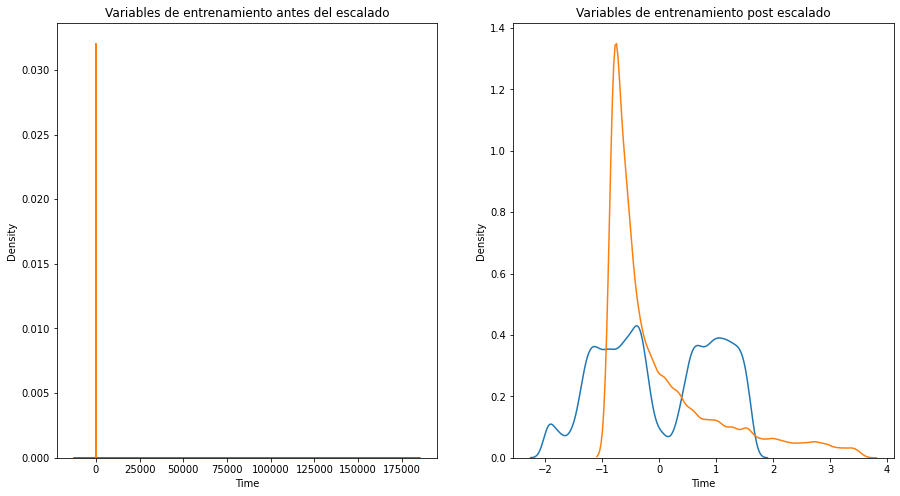

In [49]:
# Graficar las variables antes del escalado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))

ax0.set_title('Variables de entrenamiento antes del escalado')
sns.kdeplot(X_train['Time'], ax=ax0)
sns.kdeplot(X_train['Amount'], ax=ax0)

ax1.set_title('Variables de entrenamiento post escalado')
sns.kdeplot(X_train_e['Time'], ax=ax1)
sns.kdeplot(X_train_e['Amount'], ax=ax1)

plt.show();


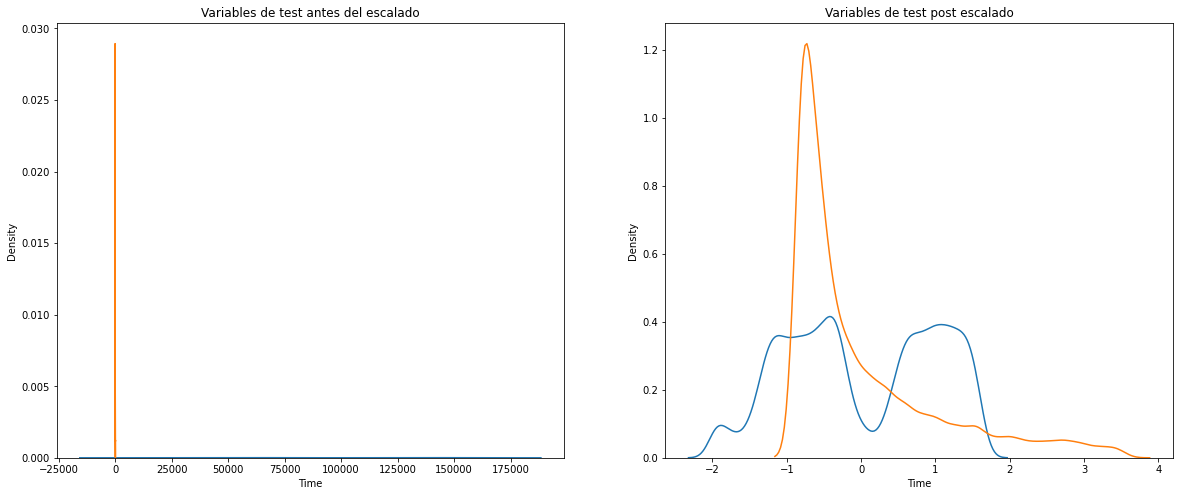

In [50]:
# Graficar las variables antes del escalado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 8))


ax0.set_title('Variables de test antes del escalado')
sns.kdeplot(X_test['Time'], ax=ax0)
sns.kdeplot(X_test['Amount'], ax=ax0)

ax1.set_title('Variables de test post escalado')
sns.kdeplot(X_test_e['Time'], ax=ax1)
sns.kdeplot(X_test_e['Amount'], ax=ax1)

plt.show();

In [51]:
# Verificar que los la cantidad de registros de train y test para x y y sean iguales 
print (len(X_train_e), len (y_train))
print (len(X_test_e), len (y_test))

189677 189677
63226 63226


In [52]:
# Probar el modelo general de Random Forest
test = RandomForestClassifier(bootstrap = False, random_state = 42)

# fit model con datos de train
test.fit(X_train_e, y_train)

# Predecir los resultados de test
y_pred_test = test.predict(X_test_e)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """



A continuación se grafica la matriz de confusión de los model a modo de visualización de los datos clasificados.

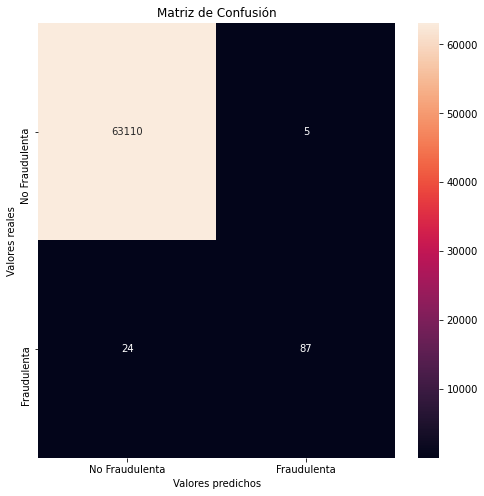

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63115
           1       0.95      0.78      0.86       111

    accuracy                           1.00     63226
   macro avg       0.97      0.89      0.93     63226
weighted avg       1.00      1.00      1.00     63226



In [53]:
#Obtener las métricas de clasificación del Modelo de Random Forest
metricas_clasificacion (y_test, y_pred_test)

Se puede observar que el modelo arroja buenos valores de precisión y Recall para ser un modelo de baseline.

#### ¿Cómo se lee la matriz de confusión?

La matriz de confusión tiene dos diagonales:

1. Diagonal principal  (elemento 0,0 y 1,1): se encuentran las predicciones correctas
2. Diagonal secundaria (elemento 0,1 y 1,0): se encuentran los errores de predicción.

Significado de cada valor de la matriz:

Serán tomados como **$positivos$** los casos fraudulentos  y **$negativos$ **los casos no fraudulentos.

* No Fraudulenta real - No Fraudulenta: Negativo Real (Valor 0,0).
* No Fraudulenta real  - Fraudulenta: Falso positivo (Valor 0, 1) (error tipo I) - Predicciones incorrectas de la clase negativa. En la estadística, es llamado error de tipo I.
* Fradulenta real - Predicción No Fradulenta: Falso negativo (Valor 1, 0): Predicciones incorrectas de la clase positiva. En la estadística, es llamado error del tipo II.
* Fradulenta real - Predicción Fradulenta : Positivo real (valor 1,1)

***La matriz de confusión no es una métrica correcta para utilizar en casos de datasets desbalanceados, ya que al contar una de las clases con una escasa frecuencia, este gráfico puede conducir a decisiones desacertadas.***

##### Métricas a utilizar según tipo de error:

**a) Precisión:** mide el porcentaje de predicciones positivas correctas (Falsos positivos y Falsos negativos).  Cuán cerca está la medición del valor verdadero.

**b) Recall (Sensibilidad):** porcentaje de casos positivos detectados (Falsos negativos verdadero positivo). Proporción de operaciones positivas detectadas.

**c) Especificidad (Especify):** porcentaje de casos negativos detectados (Negativo real y falso positivo). Casos negativos correctamente detectados.

**d) Exactiud:** Porcentaje de predicciones correctas (predicción correcta / total de las predicciones) . (Casos reales predichos vs. reales totales). *No es correcto para datasets desbalanceados*


Se puede observar que el modelo clasifica incorrectamente 24 casos como no fraudulentos cuando si lo son (falsos negativos) y 5 falsos positivos (el modelo clasifica como fraude cuando no lo es).


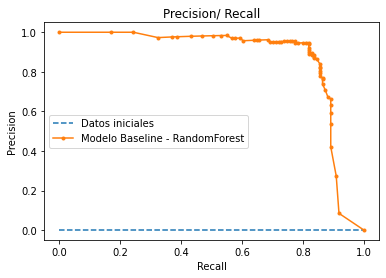

In [54]:
#Graficar la curva Precisión / Recall

pred_prob_test = test.predict_proba(X_test_e)

# Almacenar solo las probabilidades de la clase == 1
lr_prob_test = pred_prob_test[:, 1]

lr_precision_test, lr_recall_test, _ = precision_recall_curve(y_test, lr_prob_test)
lr_f1, lr_auc = f1_score(y_test, y_pred_test), auc(lr_recall_test, lr_precision_test)


# Implementar el gráfico
fraude = len(y_test[y_test.Class==1]) / len(y_test)
pyplot.plot([0, 1], [fraude, fraude], linestyle='--', label='Datos iniciales')
pyplot.plot(lr_recall_test, lr_precision_test, marker='.', label='Modelo Baseline - RandomForest')


pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.title ("Precision/ Recall")
pyplot.show()

#### Cómo interpretar la gráfiica  Precision / Recall


El enfoque de la curva Precision / Recall en la clase minoritaria la convierte en un diagnóstico eficaz para modelos de clasificación binaria desequilibrados.
¿Porqué se enfoca en la clase minoritaria? Porque toma la comparación de dos métricas que calculan la capacidad de predicción de los valores positivos.

Como ya se mencionó, la **precisión** cuantifica el valor de los verdaderos positivos en las predicciones (verdaderos positivos y falsos positivos)
Es calculado teniendo en cuenta los verdaderos positivos / (Verdaderos positivos + Falsos positivos).
**A mayor tasa de predicción, mayor precisión y mejor es el algoritmo.**

El **recall**,cuantifica el valor de los verdaderos positivos sobre todas las predicciones positivas que podrían haberse hecho (verdaderos positivos y falsos negativos).
Es calculado teniendo en cuenta los verdaderos positivos / (Verdaderos positivos + falsos negativos)
**A mayor tasa de recall, mayor capacidad de predicción tiene el algoritmo**


* Un modelo con habilidad perfecta de predicción se representa como un punto en una coordenada de (1,1). 
* Un modelo hábil está representado por una curva que se inclina hacia una coordenada de (1,1). 
* Un modelo sin habilidades será una línea horizontal en el gráfico con una precisión proporcional al número de ejemplos positivos en el conjunto de datos, por lo que para un conjunto de datos equilibrado, será 0,5.


La gráfica permite observar la relación entre precisión y recall, como para incrementar una se reduce la otra. 
En este caso, el modelo tiene una reducción gradual, por lo que los valores son buenos como métrica inicial.

In [55]:

# Almacenar los datos para curva AUC
auc_score_test = roc_auc_score(y_test, pred_prob_test[:,1])

print("ROC - AUC Score Baseline", auc_score_test)

ROC - AUC Score Baseline 0.9585541336313735


El modelo de baseline tiene valores muy altos de ROC/AUC, por lo que el modelo es capaz de predecir correctamente los falsos positivos y negativos.
Entre más alto es el valor ROC - AUC, mejor es la capacidad de predicción.
Valores de ROC - AUC iguales a 0.5, indican que el modelo no tienen ninguna capacidad de distinción entre los valores a clasificar.

In [56]:
# Preparar los datos de curva ROC
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_test[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

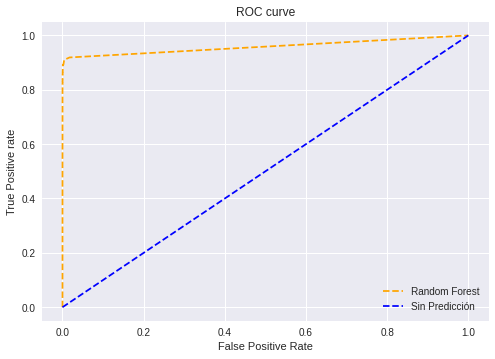

In [57]:
plt.style.use('seaborn')

# Graficar curva ROC
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
#plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AUC Reg. Logística = %0.3f'% roc_auc)
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='AUC RandomForest = %0.3f'% roc_auc)

# Graficamos la línea base
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = "Sin Predicción")

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Cómo interpretar la curva ROC - AUC:
La curva muestra en el eje x la tasa de falsos positivos (se predice fraude cuando no hay), y en el eje y la tasa de verdaderos positivos (predicción correcta sobre el fraude, es decir la métrica de sensibilidad o recall).


Al evaluar los verdaderos positivos y falsos positivos para diferentes valores de umbral, se construye la curva ROC, que se extiende desde la parte inferior izquierda hacia la parte superior derecha y se debería inclinarse hacia la parte superior izquierda. 

**Por lo tanto, se desea que la fracción de predicciones de clase positivas correctas sea 1 (parte superior de la gráfica) y la fracción de predicciones de clase negativas incorrectas sea 0 (izquierda de la gráfica). Esto resalta que el mejor clasificador posible que logra la habilidad perfecta es la parte superior izquierda de la gráfica (coordenada 0,1).**


Un algoritmo clasificador que no tiene poder discriminativo entre clases positivas y negativas formará una línea diagonal entre una Tasa de falsos positivos de 0 y una Tasa de verdaderos positivos de 0 (coordinar (0,0) ó predecir todas las clases negativas) a una tasa de falsos positivos de 1 y una tasa de verdaderos positivos de 1 (coordinar (1,1) ó predecir todas las clases positivas) como se visualiza para el caso de Random Forest.


**Los modelos representados por puntos debajo de esta línea tienen peor que ninguna capacidad de predicción y son llamados curva AUC.**



Se puede observar que el modelo de baseline distingue correctamente las clases, encontrando valores cercanos a 1 en los verdaderos positivos.

### Reducción de dimensionalidad
Al contar con una grantidad de features, de las cuales muchas no tienen correlación significativa, se llevará a cabo la reducción de dimensionalidad, y se probará vs. el modelo de baseline para verificar si es conveniente llevarla a cabo.


In [58]:
# Implementar el modelo de PCA para reducción de dimensionalidad
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_e)
#Entrenar el modelo de train
X_train_reduced = pca.transform(X_train_e)

In [59]:
# Entrenar el modelo de test
X_test_reduced = pca.transform (X_test_e)

In [60]:
#Controlar que X y y de train y test tengan la misma cantidadad de registros
print (len(X_train_reduced), len (y_train))
print (len(X_test_reduced), len (y_test))

189677 189677
63226 63226


In [61]:
# Probar el modelo general de Random Forest
test = RandomForestClassifier(bootstrap = False, random_state = 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


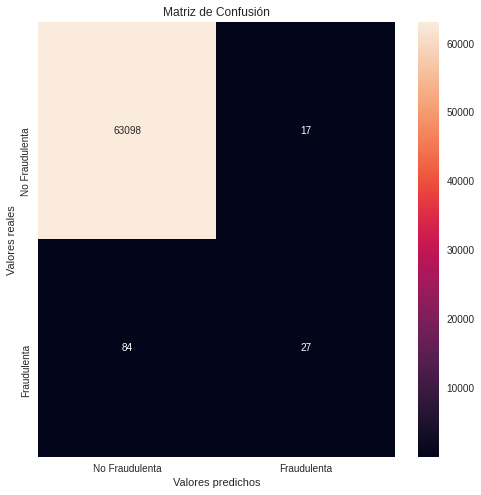

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63115
           1       0.61      0.24      0.35       111

    accuracy                           1.00     63226
   macro avg       0.81      0.62      0.67     63226
weighted avg       1.00      1.00      1.00     63226



In [62]:
# fit model
test.fit(X_train_reduced, y_train)
# Predecir los resultados
y_pred_reduced = test.predict(X_test_reduced)
#Obtener las métricas de clasificación del Modelo de Random Forest
metricas_clasificacion (y_test, y_pred_reduced);

La gráfica permite observar como el modelo con reducción de dimensionalidad incrementa la cantidad de falsos negativos a 83, a su vez solo clasifica 28 operaciones fradulentas de manera correcta, e incrementa los falsos positivos a 18.
Esto se ve reflejando en una disminución drástica de la métrica de precisión y por sobre todo el recall.
En primer instancia, se observa que una reducción de dimensionalidad tan drástica genera que el modelo no tenga capacidad de clasificación. 



Se llevarán a cabo la gráfica del resto de las métricas para comprobar lo observado a través de la matriz de confusión y métricas asociadas.

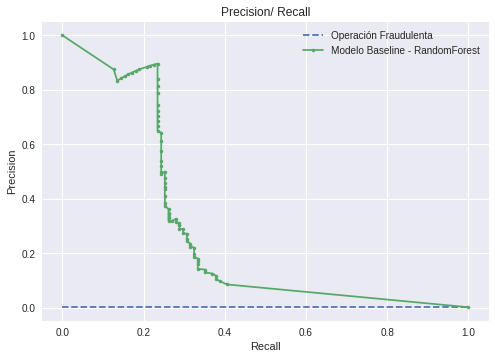

In [63]:
#Graficar la curva Precisión / Recall

pred_prob_reduced = test.predict_proba(X_test_reduced)

# Almacenar solo las probabilidades de la clase == 1
lr_prob_reduced = pred_prob_reduced[:, 1]

lr_precision_reduced, lr_recall_reduced, _ = precision_recall_curve(y_test, lr_prob_reduced)
lr_f1, lr_auc = f1_score(y_test, y_pred_reduced), auc(lr_recall_reduced, lr_precision_reduced)


# Implementar el gráfico
fraude = len(y_test[y_test.Class==1]) / len(y_test)
pyplot.plot([0, 1], [fraude, fraude], linestyle='--', label='Operación Fraudulenta')
pyplot.plot(lr_recall_reduced, lr_precision_reduced, marker='.', label='Modelo Baseline - RandomForest')


pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.title ("Precision/ Recall")
pyplot.show()

Se puede observar el cambio drástico en la gráfica de Precision - Recall, donde el modelo va disminuyendo su precisión para incrementar el Recall.

In [64]:
# Preparar los datos de curva ROC
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_reduced[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [65]:
# Almacenar los datos para curva AUC
auc_score_reduced = roc_auc_score(y_test, pred_prob_reduced[:,1])

print("ROC - AUC Score Baseline", auc_score_reduced)

ROC - AUC Score Baseline 0.6999371232120974


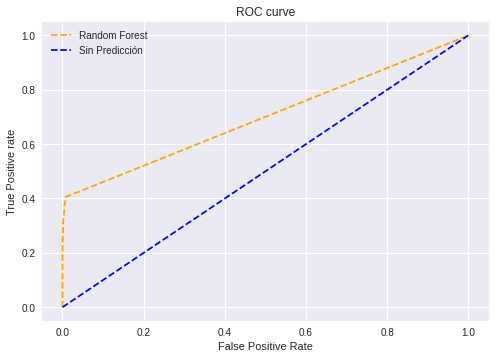

In [66]:
plt.style.use('seaborn')

# Graficar curva ROC
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
#plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AUC Reg. Logística = %0.3f'% roc_auc)
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='AUC RandomForest = %0.3f'% roc_auc)

# Graficamos la línea base
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = "Sin Predicción")

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Se puede observar como el modelo no alcanza valores superiores a 0.6 en la capacidad de predecir los casos de fraude, como también el incremnto en los falsos positivos.

Se comprueba que el ROC - AUC score se ve altamente afectado.

### Conclusiones de la comparación del análisis de reducción de dimensionalidad:
Se observa que llevar a cabo una reducción de dimensionalidad de 30 a 2 dimensiones, genera una pérdida muy grande en la capacidad de clasificación del modelo.

**Debe llevarse a cabo una prueba con una menor reducción, hasta encontrar el balanceo correcto entre costo computacional y capacidad de predicción.**

En este caso, debido a la cantidad de registros disponibles, se aplicará el modelo con todas sus features.


### 1. Aplicación de distintos modelos de Clasificación sin aplicar técnicas de balanceo de clases

In [67]:
# Definir los modelos de Clasificación a aplicar y almacenarlos en una variable:
MLA = [
    linear_model.LogisticRegressionCV(random_state = 42),
    LogisticRegression(C=1.0,penalty='l2',random_state=42,solver="newton-cg"),
    naive_bayes.GaussianNB(),
    tree.DecisionTreeClassifier(max_depth=3, random_state = 42),
    ensemble.RandomForestClassifier(bootstrap = False, random_state = 42),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    neural_network.MLPClassifier(alpha=1, random_state = 42),
    xgb.XGBClassifier(n_estimators=500, objective='binary:logistic', eval_metric='auc', eta=0.1, max_depth=6, subsample=1, colsample_bytree=0.3, silent=1)
]


In [68]:
# Crear una variable para comparar las métricas de los distintos clasificadores:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

# Entrenar los modelos de clasifiicación:
row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_e, y_train).predict(X_test_e)
        fp, tp, th = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

        row_index+=1
    else:
        predicted = alg.fit(X_train_e, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp, tp, th = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp) 
        row_index+=1
# Almacenar en la tabla los resultados de la clasificación de la clase 1: Fraude
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1) 
MLA_compare

,MLA Name,Precision,Recall,AUC
1,QuadraticDiscriminantAnalysis,0.064918,0.891892,0.934649
2,GaussianNB,0.067834,0.837838,0.908795
3,XGBClassifier,0.956989,0.801802,0.900869
4,RandomForestClassifier,0.945652,0.783784,0.891852
5,DecisionTreeClassifier,0.840000,0.756757,0.878252
6,MLPClassifier,0.860759,0.612613,0.806219
7,LogisticRegressionCV,0.850000,0.612613,0.806211
8,LogisticRegression,0.850000,0.612613,0.806211


**Se puede observar que los modelos que alcanzan mejor equilibrio entre precisión y Recall son los modelos de XGBBoost y Random Forest.**
Los modelos de clasificación que llevar a cabo las predicciones a través de la curva de regresión producen un desbalanceo de estas métricas, prevalenciendo una sobre otra.

## Técnicas de Sub y Sobre muestreo (Under and Over Sampling)

In [69]:
# Crear una variable para almacenar la cantidad de muestras por clase
count_class_0, count_class_1 = y_train.Class.value_counts()

# Crear dos datasets distintos para cada clase
df_class_0 = df_train[df_train['Class'] == 0]
df_class_1 = df_train[df_train['Class'] == 1]

### 2. Técnicas de submuestreo:

**a) Random Undersampling con imblearn:**
Elimina registros de la clase mayoritaria de manera aleatoria.

In [70]:
# Generar el modelo
rus = RandomUnderSampler(random_state=42, sampling_strategy = "majority")
# Crear las nuevas variables X y y
X_train_ru, y_train_ru = rus.fit_sample(X_train_e, y_train)


In [71]:
# Verificar los valores antes de la transformación
print("Antes del Random UnderSampling, Count de la Clase '1': {}".format(sum(y_train.Class == 1))) 
print("Antes del Random Undersampling, Count de la Clase '0': {} \n".format(sum(y_train.Class == 0)))

# Verificar los valores Después de la transformación
print("Después del Random UnderSampling, Count de la Clase '1': {}".format(sum(y_train_ru == 1))) 
print("Después del Random UnderSampling, Count de la Clase '0': {} \n".format(sum(y_train_ru == 0)))


Antes del Random UnderSampling, Count de la Clase '1': 290
Antes del Random Undersampling, Count de la Clase '0': 189387 

Después del Random UnderSampling, Count de la Clase '1': [290]
Después del Random UnderSampling, Count de la Clase '0': [290] 



In [72]:
# Convertir en formato Dataframe
X_train_ru= pd.DataFrame(data=X_train_ru, columns= ["Time", "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
y_train_ru= pd.DataFrame(data=y_train_ru, columns= ["Class"])

In [73]:
# Entrenar los modelos
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_ru, y_train_ru).predict(X_test_e)
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1)

        row_index+=1
    else:
        predicted = alg.fit(X_train_ru, y_train_ru, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1) 
        row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1)
MLA_compare

,MLA Name,Precision,Recall,AUC
1,XGBClassifier,0.073069,0.945946,0.962421
2,MLPClassifier,0.080911,0.927928,0.954695
3,RandomForestClassifier,0.074047,0.927928,0.953760
4,LogisticRegression,0.054555,0.927928,0.949823
5,LogisticRegressionCV,0.068872,0.918919,0.948535
6,DecisionTreeClassifier,0.152886,0.882883,0.937140
7,GaussianNB,0.046629,0.828829,0.899513
8,QuadraticDiscriminantAnalysis,0.023422,0.855856,0.896549


Mediante la técnica de Sub muestre aleatorio, el modelo de XGB es el que obtiene mejor AUC, pero todos los modelos tienen una baja precisión.
Esto se debe a que que al aplicar una técnica de sub muestreo, el modelo genera gran cantidad de falsos positivos (predecir fraude cuando no lo es).
Por otro lado se obtiene un alto Recall, lo que indica que predice correctamente los verdaderos positivos.


**b) Undersampling mediante la técnica de K-Means:**
El algoritmo lleva a cabo la reducción de registros en la clase mayoritaria aplicando la técnica de clustering previamente. De esta manera, genera los nuevos registros de a clase mayoritaria en función a los centroides clasificados previamente.

In [74]:
# Generar y entrenar el modelo
cc = ClusterCentroids(random_state = 42)
X_train_cc, y_train_cc = cc.fit_resample(X_train_e, y_train)


In [75]:
# Verificar los valores antes de la transformación
print("Antes del Cluster Centroids UnderSampling, Count de la Clase '1': {}".format(sum(y_train.Class == 1))) 
print("Antes del Cluster Centroids Undersampling, Count de la Clase '0': {} \n".format(sum(y_train.Class == 0)))

# Verificar los valores Después de la transformación
print("Después del Cluster Centroids Undersampling, Count de la Clase '1': {}".format(sum(y_train_cc == 1))) 
print("Después del Cluster Centroids Undersampling, Count de la Clase '0': {} \n".format(sum(y_train_cc == 0)))

Antes del Cluster Centroids UnderSampling, Count de la Clase '1': 290
Antes del Cluster Centroids Undersampling, Count de la Clase '0': 189387 

Después del Cluster Centroids Undersampling, Count de la Clase '1': 290
Después del Cluster Centroids Undersampling, Count de la Clase '0': 290 



In [76]:
# Convertir en formato Dataframe
X_train_cc= pd.DataFrame(data=X_train_cc, columns= ["Time", "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
y_train_cc= pd.DataFrame(data=y_train_cc, columns= ["Class"])

In [77]:
# Entrenar los modelos
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_cc, y_train_cc).predict(X_test_e)
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1)

        row_index+=1
    else:
        predicted = alg.fit(X_train_cc, y_train_cc, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1) 
        row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1)
MLA_compare

,MLA Name,Precision,Recall,AUC
1,MLPClassifier,0.087660,0.927928,0.955472
2,LogisticRegressionCV,0.181651,0.891892,0.942413
3,LogisticRegression,0.062344,0.900901,0.938536
4,DecisionTreeClassifier,0.012970,0.954955,0.913570
5,GaussianNB,0.186335,0.810811,0.902292
6,XGBClassifier,0.008337,0.963964,0.881158
7,RandomForestClassifier,0.005683,0.990991,0.843036
8,QuadraticDiscriminantAnalysis,0.003632,0.963964,0.749414


Como en la técnica anterior, se observa que los modelos con aplicación de técnicas de undersampling generación una baja capacidad de precisión. El modelo que alcanza un AUC alto con mayor precisión es el de Regresión Logistica con penalización.

**c) TomekLinks:**
Este método localiza los registros en la clase mayoritaria que están más cerca de la clase minoritaria y luego los elimina. Esto permite eliminar casos ambiguos y facilitar el posterior entrenamiento del modelo.

In [78]:
tl = TomekLinks(random_state = 42, ratio='majority')
X_train_tl, y_train_tl = tl.fit_resample(X_train_e, y_train)


In [79]:
# Verificar los valores antes de la transformación
print("Antes del Random UnderSampling, Count de la Clase '1': {}".format(sum(y_train.Class == 1))) 
print("Antes del Random Undersampling, Count de la Clase '0': {} \n".format(sum(y_train.Class == 0)))

# Verificar los valores Después de la transformación
print("Después del Tomek Undersampling, Count de la Clase '1': {}".format(sum(y_train_tl == 1))) 
print("Después del Tomke Undersampling, Count de la Clase '0': {} \n".format(sum(y_train_tl == 0)))

Antes del Random UnderSampling, Count de la Clase '1': 290
Antes del Random Undersampling, Count de la Clase '0': 189387 

Después del Tomek Undersampling, Count de la Clase '1': 290
Después del Tomke Undersampling, Count de la Clase '0': 189374 



In [80]:
# Convertir en formato Dataframe
X_train_tl= pd.DataFrame(data=X_train_tl, columns= ["Time", "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
y_train_tl= pd.DataFrame(data=y_train_tl, columns= ["Class"])

In [81]:
# Entrenar los modelos
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_tl, y_train_tl).predict(X_test_e)
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1)

        row_index+=1
    else:
        predicted = alg.fit(X_train_tl, y_train_tl, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1) 
        row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1)
MLA_compare

,MLA Name,Precision,Recall,AUC
1,QuadraticDiscriminantAnalysis,0.064961,0.891892,0.934657
2,GaussianNB,0.067834,0.837838,0.908795
3,XGBClassifier,0.946809,0.801802,0.900861
4,RandomForestClassifier,0.936842,0.801802,0.900853
5,DecisionTreeClassifier,0.840000,0.756757,0.878252
6,LogisticRegressionCV,0.850000,0.612613,0.806211
7,LogisticRegression,0.850000,0.612613,0.806211
8,MLPClassifier,0.858974,0.603604,0.801715


Esta técnica al no igualar las clases minoritarias y mayoritarias en la cantidad de registros y tomar como referencia para las clasificaciones la técnica de vecinos más cercanos, permite obtener un equilibrio entre precisión y recall en los casos de XGB, RandomForest y árbol de decisión.
Los modelos que aplican la regresión lineal con penalidad no obtienen un buen equlibrio por el hecho de partir de la línea de regresión como base, penalizando todos los casos lejanos a esta.

### 3. Técnicas de sobremuestreo:

**a) Sobremuestreo aleatorio**

Se aplicará la técnica similar a sub muestreo, pero en lugar de reducir la clase minoritaria, se aumentarán los registros de la mayoritaria, copiando aleatoriamente los existentes.




In [82]:
# Generar el modelo tomando como estrategia de resampleo la clase minoritaria
ros = RandomOverSampler(random_state = 42, sampling_strategy ='minority')
X_train_ro, y_train_ro = ros.fit_sample(X_train_e, y_train)

In [83]:
print("Antes del Random Overampling, Count de la Clase '1': {}".format(sum(y_train.Class == 1))) 
print("Antes del Random Overampling, Count de la Clase '0': {} \n".format(sum(y_train.Class == 0)))

# Verificar los valores Después de la transformación
print("Después del Random Oversampling, Count de la Clase '1': {}".format(sum(y_train_ro == 1))) 
print("Después del Random Oversampling, Count de la Clase '0': {} \n".format(sum(y_train_ro == 0)))

Antes del Random Overampling, Count de la Clase '1': 290
Antes del Random Overampling, Count de la Clase '0': 189387 

Después del Random Oversampling, Count de la Clase '1': 189387
Después del Random Oversampling, Count de la Clase '0': 189387 



In [84]:
# Convertir en formato Dataframe
X_train_ro= pd.DataFrame(data=X_train_ro, columns= ["Time", "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
y_train_ro= pd.DataFrame(data=y_train_ro, columns= ["Class"])

In [85]:
# Entrenar los modelos
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_ro, y_train_ro).predict(X_test_e)
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1)

        row_index+=1
    else:
        predicted = alg.fit(X_train_ro, y_train_ro, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1) 
        row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1)
MLA_compare

,MLA Name,Precision,Recall,AUC
1,MLPClassifier,0.165862,0.927928,0.959860
2,LogisticRegressionCV,0.082931,0.927928,0.954941
3,LogisticRegression,0.082665,0.927928,0.954909
4,DecisionTreeClassifier,0.237864,0.882883,0.938954
5,QuadraticDiscriminantAnalysis,0.046309,0.909910,0.938477
6,XGBClassifier,0.904762,0.855856,0.927849
7,GaussianNB,0.059739,0.864865,0.920462
8,RandomForestClassifier,0.945055,0.774775,0.887348


* A través de la técnica de oversampling, comparados con la tecnica de undersampling, donde el modelo de XGB y Random Dorest obtienen un cercano equlibrio entre precisión y recall, a expensas de valores un poco más bajos en la métrica AUC.

En los modelos no parámetricos, mejora la métrica de precisión por el hecho de incrementar los casos positivos, permitiendole al algoritmo contar con más casos y reducir el falso positivo.

**b) Generación de datos sintéticos a través de la técnica SMOTE:**
Generar datos sintéticos de la clase minoritaria en función a los registros existentes.

In [86]:
# Crear el modelo SMOTE
sm = SMOTE(random_state = 42, sampling_strategy = "minority") 
# Crear las variables del modelo y entrenarlo
X_train_sm, y_train_sm = sm.fit_resample(X_train_e, y_train) # convertirlo a una dimensión 

In [87]:
# Verificar los valores antes de la transformación
print("Antes del SMOTE OverSampling, Count de la Clase '1': {}".format(sum(y_train.Class == 1))) 
print("Antes del SMOTE OverSampling, Count de la Clase '0': {} \n".format(sum(y_train.Class == 0)))

# Verificar los valores Después de la transformación
print("Después del SMOTE OverSampling, Count de la Clase '1': {}".format(sum(y_train_sm == 1))) 
print("Después del SMOTE OverSampling, Count de la Clase '0': {} \n".format(sum(y_train_sm == 0)))



Antes del SMOTE OverSampling, Count de la Clase '1': 290
Antes del SMOTE OverSampling, Count de la Clase '0': 189387 

Después del SMOTE OverSampling, Count de la Clase '1': 189387
Después del SMOTE OverSampling, Count de la Clase '0': 189387 



In [88]:
# Convertir en formato Dataframe
X_train_sm= pd.DataFrame(data=X_train_sm, columns= ["Time", "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
y_train_sm= pd.DataFrame(data=y_train_sm, columns= ["Class"])

#### Efectuar las pedicciones

In [89]:
# Efectuar las predicciones
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_sm, y_train_sm).predict(X_test_e)
        fp_5, tp_5, th_5 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_5, tp_5)

        row_index+=1
    else:
        predicted = alg.fit(X_train_sm, y_train_sm, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp_5, tp_5, th_5 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_5, tp_5) 
        row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1)
MLA_compare

,MLA Name,Precision,Recall,AUC
1,MLPClassifier,0.131714,0.927928,0.958585
2,LogisticRegression,0.079292,0.927928,0.954489
3,LogisticRegressionCV,0.079231,0.927928,0.954481
4,QuadraticDiscriminantAnalysis,0.060976,0.900901,0.938250
5,XGBClassifier,0.822034,0.873874,0.936771
6,DecisionTreeClassifier,0.037491,0.909910,0.934413
7,GaussianNB,0.060777,0.873874,0.925062
8,RandomForestClassifier,0.921569,0.846847,0.923360


El modelo obtiene valores levemente inferiores a los conseguidos a través de la técnicas aplicadas anteriormente en precisión.

**c) Oversampling a través de ADASYN :**
A diferencia del modelo SMOTE - Tomek toma en cuenta los casos de los registros que son clasificados erróneamente con el método de vecinos cercanos, mejorando las futuras predicciones.

In [90]:
#Generar y entrenar el modelo
adasyn = ADASYN(ratio='minority', random_state=42)
X_train_ad, y_train_ad = adasyn.fit_sample(X_train_e, y_train)

In [91]:
print("Antes de ADASYN OverSampling, Count de la Clase '1': {}".format(sum(y_train.Class == 1))) 
print("Antes del ADASYN OverSampling, Count de la Clase '0': {} \n".format(sum(y_train.Class == 0)))

# Verificar los valores Después de la transformación
print("Después del ADASYN OverSampling, Count de la Clase '1': {}".format(sum(y_train_ad == 1))) 
print("Después del ADASYN OverSampling, Count de la Clase '0': {} \n".format(sum(y_train_ad == 0)))

Antes de ADASYN OverSampling, Count de la Clase '1': 290
Antes del ADASYN OverSampling, Count de la Clase '0': 189387 

Después del ADASYN OverSampling, Count de la Clase '1': 189379
Después del ADASYN OverSampling, Count de la Clase '0': 189387 



In [92]:
# Convertir en formato Dataframe
X_train_ad= pd.DataFrame(data=X_train_ad, columns= ["Time", "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
y_train_ad= pd.DataFrame(data=y_train_ad, columns= ["Class"])

In [93]:
# Entrenar los modelos
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_ad, y_train_ad).predict(X_test_e)
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1)

        row_index+=1
    else:
        predicted = alg.fit(X_train_ad, y_train_ad, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1) 
        row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1)
MLA_compare

,MLA Name,Precision,Recall,AUC
1,MLPClassifier,0.083400,0.936937,0.959414
2,QuadraticDiscriminantAnalysis,0.072359,0.900901,0.940294
3,LogisticRegressionCV,0.019504,0.963964,0.939369
4,LogisticRegression,0.019486,0.963964,0.939330
5,XGBClassifier,0.782258,0.873874,0.936723
6,GaussianNB,0.044688,0.882883,0.924845
7,DecisionTreeClassifier,0.015630,0.954955,0.924590
8,RandomForestClassifier,0.949495,0.846847,0.923384


El modelo de Random Forest obtiene un buen equilibrio entre Precisión y Recall, a expensas del menor AUC en el modelo.
Es importante destacar, como este modelo permite reducir la predicción de los falsos negativos en los modelos no paramétricos.

**Combinar Sobre y Sub Muestreo con STOME Tomek**

Este modelo combina la eliminación de registros de la clase mayoritaria con el incremento de registros en la clase mayoritaria, tomando en cuenta los vecinos cercanos de cada clase.

In [94]:
smt = SMOTETomek()
X_train_smt, y_train_smt = smt.fit_resample(X_train_e, y_train)


In [95]:
# Verificar los valores antes de la transformación
print("Antes de Smote Tomek, Count de la Clase '1': {}".format(sum(y_train.Class == 1))) 
print("Antes del Smote Tomek, Count de la Clase '0': {} \n".format(sum(y_train.Class == 0)))

# Verificar los valores Después de la transformación
print("Después de Smote Tomek, Count de la Clase '1': {}".format(sum(y_train_smt == 1))) 
print("Después de Smote Tomek, Count de la Clase '0': {} \n".format(sum(y_train_smt == 0)))

Antes de Smote Tomek, Count de la Clase '1': 290
Antes del Smote Tomek, Count de la Clase '0': 189387 

Después de Smote Tomek, Count de la Clase '1': 189387
Después de Smote Tomek, Count de la Clase '0': 189387 



In [96]:
# Convertir en formato Dataframe
X_train_smt= pd.DataFrame(data=X_train_smt, columns= ["Time", "V1", "V2", "V3", "V4", "V5","V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
y_train_smt= pd.DataFrame(data=y_train_smt, columns= ["Class"])

In [97]:
# Entrenar los modelos
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    import warnings
    warnings.filterwarnings("ignore") 
    if alg != xgb.XGBClassifier:
        predicted = alg.fit(X_train_smt, y_train_smt).predict(X_test_e)
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1)

        row_index+=1
    else:
        predicted = alg.fit(X_train_smt, y_train_smt, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test_e, y_test)])
        fp_1, tp_1, th_1 = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp_1, tp_1) 
        row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare = MLA_compare.reset_index (drop = True)
MLA_compare.index = np.arange( 1, len(MLA_compare) + 1)
MLA_compare

,MLA Name,Precision,Recall,AUC
1,MLPClassifier,0.140518,0.927928,0.958973
2,LogisticRegression,0.079475,0.927928,0.954513
3,LogisticRegressionCV,0.079292,0.927928,0.954489
4,QuadraticDiscriminantAnalysis,0.061473,0.909910,0.942739
5,XGBClassifier,0.843478,0.873874,0.936794
6,GaussianNB,0.060853,0.873874,0.925078
7,RandomForestClassifier,0.930693,0.846847,0.923368
8,DecisionTreeClassifier,0.021007,0.909910,0.917666


Los modelos de XGB Boost y RandomForest son los que obtienen mejor equilibrio entre precisión y recall, sin producir bajas contundentes en la métria de AUC.

### Conclusión del modelado
La técnica que obtiene mayor equilibrio entre precisión, recall y AUC es la técnica de ADASYN para el modelo de RandomForest, con una precisión de 0.93, Recall de 0.84 y AUC de 0.92.

El modelo con mayor AUC pero baja precisión es el submuestreo aleatorio, alcanzando un AUC de 0.96.

**El modelo de ADASYN  mejora el valor AUC del modelo inicial en un 0.02, y la diferencia entre Precisión y Recall en un 0.06.**

## Selección del modelo final
Se graficarán los modelos de ADASYN de Random Forest que obtiene el mejor equilibrio entre precisión y Recall y el modelo de submuestro aleatorio con XGB que obtiene mejor AUC para seleccionar el modelo final.

In [120]:

# Crear el Modelo de Random forest
modelo_forest = RandomForestClassifier(bootstrap = False, random_state = 42)

In [121]:
# Entrenamos: Arbol con la grilla definida arriba 
forest_ada = modelo_forest.fit(X_train_ad, y_train_ad)

In [122]:
y_train_pred_forest_ad = forest_ada.predict(X_train_ad)
y_test_pred_forest_ad = forest_ada.predict(X_test_e)

In [124]:
# Predecir las probabilidades
pred_prob6 = forest_ada.predict_proba(X_test_e)



In [125]:
# Almacenar los datos de la curva ROC
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)


In [126]:
# roc curve for tpr = fpr 
random_probs_6 = [0 for i in range(len(y_test))]
p_fpr_6, p_tpr_6, _ = roc_curve(y_test, random_probs_6, pos_label=1)


In [127]:
# Almacenar los datos del AUC
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

print("Valor AUC modelo ADASYN", auc_score6)

Valor AUC modelo ADASYN 0.9700971985215034


Tomando el valor AUC general del modelo y no solo de la clase 1, se puede observar que se incrementa a un 98%.

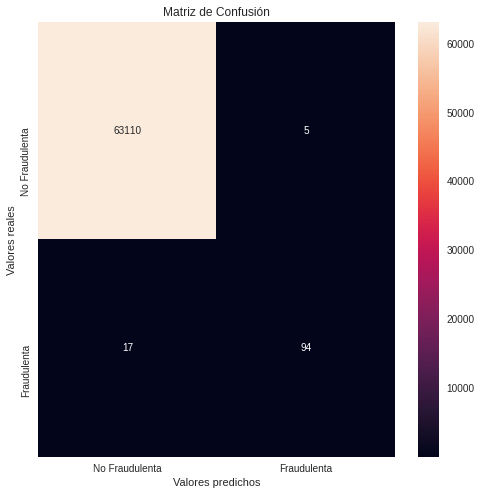

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63115
           1       0.95      0.85      0.90       111

    accuracy                           1.00     63226
   macro avg       0.97      0.92      0.95     63226
weighted avg       1.00      1.00      1.00     63226



In [129]:

# Obtener las métricas de clasificación del modelo:
metricas_clasificacion (y_test, y_test_pred_forest_ad)



La matriz de confusión afirma lo observado mediante las métricas de precisión y recall, donde el modelo presenta 5 falsos negativos y solo 17 falsos positivos.
Comparado con el modelo inicial de benchmark, el mismo mejora la cantidad de falsos negativos, categoría más importante al tratarse de predicción de fraude.

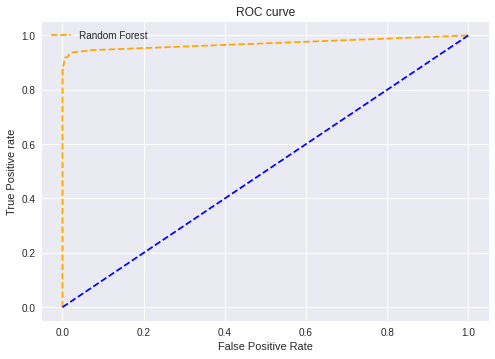

In [130]:
# Graficar la curva ROC
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Random Forest')

plt.plot(p_fpr_6, p_tpr_6, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

La curva ROC muestra como el modelo alcanza la capacidad de predicción casi todos los valores positivos reducidos ningún falsos negativos.

In [132]:
# keep probabilities for the positive outcome only
lr_probs_6 = pred_prob6[:, 1]

lr_precision_6, lr_recall_6, _ = precision_recall_curve(y_test, lr_probs_6)
lr_f1_6, lr_auc_6 = f1_score(y_test, y_test_pred_forest_ad), auc(lr_recall_6, lr_precision_6)


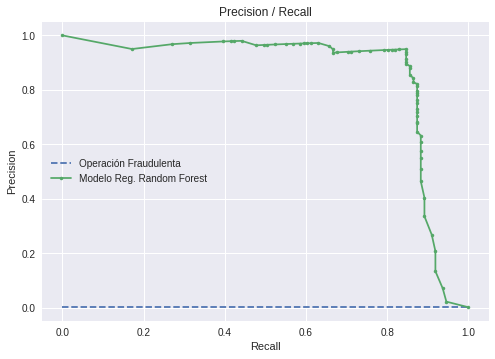

In [133]:
# plot the precision-recall curves
fraude = len(y_test[y_test.Class==1]) / len(y_test)
pyplot.plot([0, 1], [fraude, fraude], linestyle='--', label='Operación Fraudulenta')
pyplot.plot(lr_recall_6, lr_precision_6, marker='.', label='Modelo Reg. Random Forest')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
plt.title ("Precision / Recall")
# show the plot
pyplot.show()


La gráfica permite observar que los valores de precisión son cercanos a 1 hasta llegar a un recall de 0.84, donde a expensas de incrementar el último el primero baja drásticamente.


#### Modelo de sub muestreo aleatorio - XGB (mejor AUC en la clase 1)

In [109]:
# Entrenamos: Arbol con la grilla definida arriba 

XGB_under = xgb.XGBClassifier(n_estimators=500, objective='binary:logistic', eval_metric='auc', eta=0.1, max_depth=6, subsample=1, colsample_bytree=0.3, silent=1)

XGB_under = XGB_under.fit(X_train_ru, y_train_ru)

In [110]:
y_train_pred_xgb_under = XGB_under.predict(X_train_ru)
y_test_pred_xgb_under = XGB_under.predict(X_test_e)

In [111]:
# Predecir las probabilidades
pred_prob7 = XGB_under.predict_proba(X_test_e)

In [112]:
# Almacenar los datos de la curva ROC
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)

In [113]:
# roc curve for tpr = fpr 
random_probs_7 = [0 for i in range(len(y_test))]
p_fpr_7, p_tpr_7, _ = roc_curve(y_test, random_probs_7, pos_label=1)

In [114]:
# Almacenar los datos del AUC
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

print("Valor AUC modelo optimizado", auc_score7)


Valor AUC modelo optimizado 0.9947741609945523


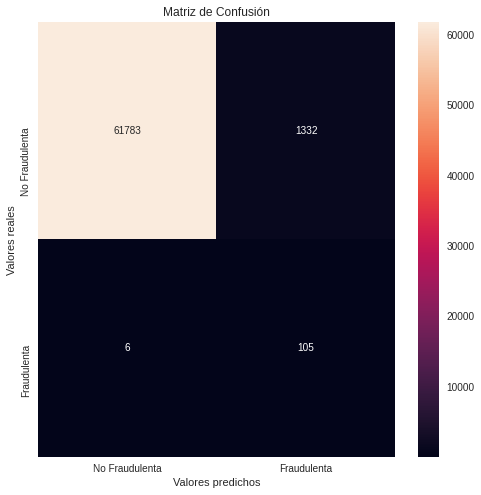

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     63115
           1       0.07      0.95      0.14       111

    accuracy                           0.98     63226
   macro avg       0.54      0.96      0.56     63226
weighted avg       1.00      0.98      0.99     63226



In [115]:

# Obtener las métricas de clasificación del modelo:
metricas_clasificacion (y_test, y_test_pred_xgb_under)


Se puede observar este modelo a pesar de un mayor AUC, tiene mayor cantidad de falsos positivos y falsos negativos.

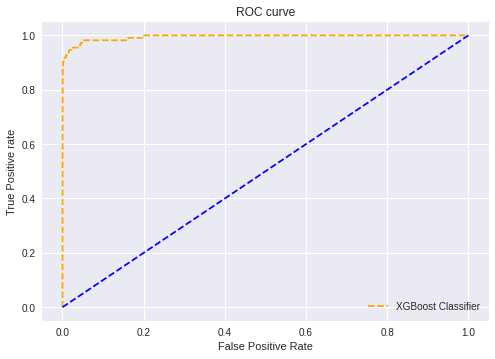

In [116]:
# Graficar la curva ROC
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='XGBoost Classifier')

plt.plot(p_fpr_7, p_tpr_7, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


Mirando solo la curva ROC, se observa que el modelo clasifica correctamente los verdaderos positivos, con una leve baja que se visualiza por la clasificación de falsos negativos.

In [117]:
# keep probabilities for the positive outcome only
lr_probs_7 = pred_prob7[:, 1]

lr_precision_7, lr_recall_7, _ = precision_recall_curve(y_test, lr_probs_7)
lr_f1_7, lr_auc_7 = f1_score(y_test, y_test_pred_xgb_under), auc(lr_recall_7, lr_precision_7)


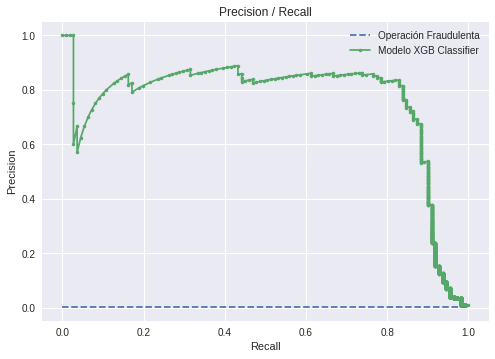

In [118]:

# plot the precision-recall curves
fraude = len(y_test[y_test.Class==1]) / len(y_test)
pyplot.plot([0, 1], [fraude, fraude], linestyle='--', label='Operación Fraudulenta')
pyplot.plot(lr_recall_7, lr_precision_7, marker='.', label='Modelo XGB Classifier')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
plt.title ("Precision / Recall")
# show the plot
pyplot.show()





La curva de precisión y Recall permite observar como en este modelo se ve  afectada un métrica la mejora de una métrica a expensas de un empeoramiento en la otra. 

Como los datos para montos extremos tienen un comportamiento distinto, es necesario efectuar similar proceso para la selección de modelos de predicción.
Se puede acotar la cantidad a modelos a probar, ya que a partir de este primer análisis se pudo arribar a la conclusión de que los modelos lineales con penalización obtienen métricas inferiores que serán descartadas.
Con los fines de evitar continuar incrementando este notebook, dicho análisis no se incluye, llevandolo a cabo por separado.

# Conclusión:
Se analizó un dataset que contiene operaciones de tarjetas de crédito clasificandolas en fradulentas y no fradulentas con el objetivo de llevar a cabo una predicción de fraude.

Se contaba con 30 variables que influyen en el proceso, de las cuales se conoce el significado de 2: tiempo de procesamiento y monto de las transacciones.
La variable clase establece si una operación es fraudulenta o no. El Dataset se cuenta altamente desbalanceado, con solo un 0.17% de operaciones fradulentas.

Se observaron 1870 operaciones de monto cero, de las cuales un 3,85% son fraudulentas. Sería necesario confirmar con expertos del tema si es correcto considerarlas dentro del modelo o se pueden eliminar los 1870 registros ya que podrían ser erróneos.

Mediante el análisis exploratorio de datos, se pudo determinar que es conveniente separar los modelos de predicción en dos: por un lado las operaciones con valores extremos y por otro las que no. Esto se justifica en que se comporta de manera distinta la correlación de las variables según el segmento en que se encuentren.


Se desarroló un modelo inicial aplicando diversos algoritmos de Machine Learning sobre el Dataset desbalanceado. Posterior a ello, se aplicaron técnicas de resampling del dataset con sub y sobre muestreo de categorías, para poder verificar si mejoran las predicciones. 
Las métricas elegidas para llevar a cabo la comparación fueron el la Precisión y el Recall.
Se pudo observar que debido a contar con un dataset desbalanceado, los modelos generalmente tienen una baja precisión, es decir, una alta capacidad de predecir falsos negativos.

**Se llegó a la conclusión que el modelo con mayor capacidad de precisión es el modelo de RandomForest con técnica de resampleo de ADASYN, alcanzando una Precisisón de 0.93 y Recall de 0.84, con 17 falsos negativos y 5 falsos positivos, reduciendo la cantidad de falsos negativos en un 29%.**

